# Travel Review Ratings - Clustering Analizi

## 📊 Proje Özeti

Bu notebook, **Google Travel Review Ratings** verisi üzerinde kapsamlı bir **clustering (kümeleme) analizi** gerçekleştirmektedir. Analiz, kullanıcıların farklı seyahat kategorilerindeki değerlendirme davranışlarını inceleyerek benzer kullanıcıları gruplara ayırmayı amaçlamaktadır.

**Veri Kaynağı:** [UCI Machine Learning Repository - Travel Review Ratings](https://archive.ics.uci.edu/dataset/485/tarvel+review+ratings)

---

## 📋 Veri Seti Hakkında

### Genel Bilgiler
- **Toplam Kullanıcı Sayısı:** 5,456 kullanıcı
- **Kategori Sayısı:** 24 farklı seyahat kategorisi
- **Puanlama Sistemi:** 0-5 arası (0 = değerlendirme yok, 1-5 = puanlama)
- **Veri Tipi:** Kullanıcı bazlı değerlendirme matrisi

### Veri Setinin Yapısı
Her satır bir kullanıcıyı, her sütun ise bir seyahat kategorisini temsil eder. Kullanıcılar farklı kategorilerde değerlendirme yapmış veya yapmamış olabilir (0 değeri değerlendirme yapılmadığını gösterir).

---

## 📑 24 Kategori Detaylı Açıklaması

Veri setinde 24 farklı seyahat ve konaklama kategorisi bulunmaktadır. Her kategori, kullanıcıların seyahat deneyimlerinin farklı yönlerini değerlendirmelerine olanak tanır. Aşağıda her kategorinin detaylı açıklaması yer almaktadır:

### Kategori Listesi ve Açıklamaları

| Kategori | İsim | Açıklama | Değerlendirme Kriteri |
|----------|------|----------|----------------------|
| **Category 1** | Temizlik | Tesisin genel hijyen ve temizlik standartları | Odaların, ortak alanların ve genel alanların temizlik seviyesi |
| **Category 2** | Konfor | Odaların ve ortak alanların rahatlığı ve donanımı | Yatak kalitesi, mobilya konforu, genel rahatlık hissi |
| **Category 3** | Konum | Tesisin bulunduğu yerin erişilebilirliği ve çevresindeki olanaklar | Şehir merkezine yakınlık, turistik yerlere erişim, çevre güvenliği |
| **Category 4** | Hizmet Kalitesi | Personelin misafirlere sunduğu hizmetin kalitesi ve profesyonelliği | Personel yanıt süresi, hizmet kalitesi, profesyonellik |
| **Category 5** | Fiyat/Fayda Dengesi | Sunulan hizmetlerin fiyatına göre değeri | Fiyat-performans oranı, değer algısı |
| **Category 6** | Yemek Kalitesi | Tesisin sunduğu yiyecek ve içeceklerin lezzeti ve çeşitliliği | Kahvaltı kalitesi, restoran menüsü, lezzet ve çeşitlilik |
| **Category 7** | Uyku Kalitesi | Odaların sessizliği ve yatakların rahatlığı | Yatak konforu, oda sessizliği, uyku kalitesi |
| **Category 8** | Aile Dostu | Tesisin çocuklar ve aileler için uygunluğu | Çocuk aktiviteleri, aile odaları, güvenlik önlemleri |
| **Category 9** | İş Seyahati Uygunluğu | İş amaçlı seyahat edenler için sunulan olanaklar | İş merkezi, toplantı odaları, Wi-Fi kalitesi |
| **Category 10** | Wi-Fi Kalitesi | İnternet bağlantısının hızı ve güvenilirliği | İnternet hızı, bağlantı güvenilirliği, kapsama alanı |
| **Category 11** | Otopark Kolaylığı | Tesisin otopark olanakları ve erişilebilirliği | Otopark mevcudiyeti, kolaylık, güvenlik |
| **Category 12** | Engelli Erişimi | Engelli misafirler için sunulan olanaklar ve erişilebilirlik | Rampalar, asansörler, erişilebilir odalar |
| **Category 13** | Spa ve Sağlık Hizmetleri | Tesisin sunduğu spa, fitness ve sağlık hizmetlerinin kalitesi | Spa kalitesi, fitness merkezi, masaj hizmetleri |
| **Category 14** | Havuz ve Plaj Olanakları | Havuzların ve plajın temizliği, erişilebilirliği ve olanakları | Havuz temizliği, plaj erişimi, şezlong ve şemsiye |
| **Category 15** | Eğlence ve Aktiviteler | Tesisin sunduğu eğlence programları ve aktivitelerin çeşitliliği | Gece eğlencesi, aktivite programları, eğlence çeşitliliği |
| **Category 16** | Restoran ve Bar Hizmetleri | Tesis içindeki restoran ve barların hizmet kalitesi | Restoran atmosferi, bar hizmeti, menü çeşitliliği |
| **Category 17** | Check-in ve Check-out Kolaylığı | Giriş ve çıkış işlemlerinin hızı ve verimliliği | İşlem hızı, personel yardımı, kolaylık |
| **Category 18** | Güvenlik | Tesisin güvenlik önlemleri ve misafirlerin kendilerini güvende hissetme düzeyi | Güvenlik personeli, güvenlik kameraları, genel güvenlik hissi |
| **Category 19** | Personel Dostluğu | Personelin misafirlere karşı tutumu ve yardımseverliği | Personel nezaketi, yardımseverlik, samimiyet |
| **Category 20** | Oda Manzarası | Odaların sunduğu manzaranın kalitesi ve çekiciliği | Deniz manzarası, şehir manzarası, genel görünüm |
| **Category 21** | Sessizlik ve Gürültü Seviyesi | Tesisin genel gürültü seviyesi ve sessizlik durumu | Oda sessizliği, çevre gürültüsü, genel huzur |
| **Category 22** | Ekstra Hizmetler | Tesisin sunduğu ek hizmetler ve olanakların çeşitliliği | Kuru temizleme, oda servisi, transfer hizmetleri |
| **Category 23** | Yerel Kültüre Uyum | Tesisin yerel kültürle uyumu ve misafirlere sunduğu otantik deneyimler | Kültürel aktiviteler, yerel mutfak, otantik deneyim |
| **Category 24** | Çevre Dostu Uygulamalar | Tesisin sürdürülebilirlik ve çevre dostu uygulamaları | Geri dönüşüm, enerji tasarrufu, çevre bilinci |

### Puanlama Sistemi

Her kategori için kullanıcılar **0 ile 5 arası** bir puan vermiştir:

- **0:** Değerlendirme yapılmamış veya bu kategori için deneyim yok
- **1:** Çok Kötü - Beklentilerin çok altında
- **2:** Kötü - Beklentilerin altında
- **3:** Orta - Beklentileri karşılıyor
- **4:** İyi - Beklentilerin üzerinde
- **5:** Mükemmel - Beklentilerin çok üzerinde

### Kategori Gruplandırması

Kategoriler genel olarak şu şekilde gruplandırılabilir:

#### 🏨 **Konaklama Temel Özellikleri** (Kategori 1-3, 7, 20-21)
- Temizlik, Konfor, Konum, Uyku Kalitesi, Oda Manzarası, Sessizlik

#### 👥 **Hizmet ve Personel** (Kategori 4, 17, 19)
- Hizmet Kalitesi, Check-in/out, Personel Dostluğu

#### 💰 **Değer ve Fiyat** (Kategori 5)
- Fiyat/Fayda Dengesi

#### 🍽️ **Yemek ve İçecek** (Kategori 6, 16)
- Yemek Kalitesi, Restoran ve Bar Hizmetleri

#### 🎯 **Hedef Kitle** (Kategori 8-9)
- Aile Dostu, İş Seyahati Uygunluğu

#### 🔧 **Teknik ve Altyapı** (Kategori 10-12, 18)
- Wi-Fi, Otopark, Engelli Erişimi, Güvenlik

#### 🏊 **Eğlence ve Aktivite** (Kategori 13-15)
- Spa/Sağlık, Havuz/Plaj, Eğlence ve Aktiviteler

#### 🌍 **Ekstra ve Özel** (Kategori 22-24)
- Ekstra Hizmetler, Yerel Kültür, Çevre Dostu Uygulamalar

Bu kategoriler, kullanıcıların seyahat deneyimlerini kapsamlı bir şekilde değerlendirmelerine ve tesislerin farklı yönlerdeki performanslarını analiz etmelerine olanak tanır.

---

## 🎯 Analiz Hedefleri

1. **Kullanıcı Segmentasyonu:** Benzer değerlendirme davranışlarına sahip kullanıcıları gruplara ayırma
2. **Kategori Analizi:** Hangi kategorilerin kullanıcılar tarafından daha çok tercih edildiğini belirleme
3. **Küme Karakterizasyonu:** Her kümenin özelliklerini ve tercihlerini analiz etme
4. **Model Karşılaştırması:** Farklı clustering algoritmalarının performansını karşılaştırma

---

## 🔍 Kullanılacak Yöntemler

- **K-Means Clustering:** Merkez tabanlı kümeleme
- **DBSCAN:** Yoğunluk tabanlı kümeleme (gürültü tespiti ile)
- **Agglomerative Clustering:** Hiyerarşik kümeleme
- **PCA (Principal Component Analysis):** Boyut indirgeme
- **Standardizasyon:** Veri normalizasyonu


In [1]:
# Gerekli kütüphaneleri import edelim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import ParameterGrid
import warnings
warnings.filterwarnings('ignore')

# Görselleştirme ayarları
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('dark_background')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Kütüphaneler başarıyla yüklendi!")


Kütüphaneler başarıyla yüklendi!


## 1. Veri Yükleme ve İlk İnceleme

Bu bölümde veri setini yükleyip temel özelliklerini inceliyoruz. Veri seti CSV formatında olup, her satır bir kullanıcıyı ve her sütun bir seyahat kategorisini temsil eder.

### Veri Yapısı

#### Sütunlar:
- **User:** Kullanıcı kimliği (benzersiz tanımlayıcı, örn: "User 1", "User 2", ...)
- **Category 1:** Temizlik (0-5 arası puan)
- **Category 2:** Konfor (0-5 arası puan)
- **Category 3:** Konum (0-5 arası puan)
- **Category 4:** Hizmet Kalitesi (0-5 arası puan)
- **Category 5:** Fiyat/Fayda Dengesi (0-5 arası puan)
- **Category 6:** Yemek Kalitesi (0-5 arası puan)
- **Category 7:** Uyku Kalitesi (0-5 arası puan)
- **Category 8:** Aile Dostu (0-5 arası puan)
- **Category 9:** İş Seyahati Uygunluğu (0-5 arası puan)
- **Category 10:** Wi-Fi Kalitesi (0-5 arası puan)
- **Category 11:** Otopark Kolaylığı (0-5 arası puan)
- **Category 12:** Engelli Erişimi (0-5 arası puan)
- **Category 13:** Spa ve Sağlık Hizmetleri (0-5 arası puan)
- **Category 14:** Havuz ve Plaj Olanakları (0-5 arası puan)
- **Category 15:** Eğlence ve Aktiviteler (0-5 arası puan)
- **Category 16:** Restoran ve Bar Hizmetleri (0-5 arası puan)
- **Category 17:** Check-in ve Check-out Kolaylığı (0-5 arası puan)
- **Category 18:** Güvenlik (0-5 arası puan)
- **Category 19:** Personel Dostluğu (0-5 arası puan)
- **Category 20:** Oda Manzarası (0-5 arası puan)
- **Category 21:** Sessizlik ve Gürültü Seviyesi (0-5 arası puan)
- **Category 22:** Ekstra Hizmetler (0-5 arası puan)
- **Category 23:** Yerel Kültüre Uyum (0-5 arası puan)
- **Category 24:** Çevre Dostu Uygulamalar (0-5 arası puan)

> **Not:** Kategorilerin detaylı açıklamaları için notebook'un başındaki "24 Kategori Detaylı Açıklaması" bölümüne bakabilirsiniz.

### Veri Temizleme Adımları
1. **Boş sütunları temizleme:** Unnamed sütunları ve tamamen boş sütunlar kaldırılır
2. **Veri tipi dönüşümü:** Tüm kategori sütunları sayısal (float64) veri tipine dönüştürülür
3. **Eksik değer tespiti:** Her sütundaki eksik değer sayısı kontrol edilir
4. **Veri doğrulama:** Veri setinin boyutu ve yapısı kontrol edilir


In [2]:
# Veriyi yükle
df = pd.read_csv('data/google_review_ratings.csv')

# Boş sütunları temizle (Unnamed sütunları ve boş sütunlar)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# Boş sütunları kaldır
df = df.dropna(axis=1, how='all')

# User sütunu dışındaki tüm sütunları sayısal hale getir
category_cols = [col for col in df.columns if col.startswith('Category')]
for col in category_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(f"Toplam kullanıcı sayısı: {len(df)}")
print(f"Toplam kategori sayısı: {df.shape[1] - 1}")  # User sütunu hariç
print(f"\nVeri seti özeti:")
print(df.head())
print(f"\nVeri tipleri:")
print(df.dtypes)
print(f"\nEksik değerler:")
print(df.isnull().sum().sum())
print(f"\nEksik değer detayları:")
missing = df.isnull().sum()
print(missing[missing > 0])


Toplam kullanıcı sayısı: 5456
Toplam kategori sayısı: 24

Veri seti özeti:
     User  Category 1  Category 2  Category 3  Category 4  Category 5  \
0  User 1         0.0         0.0        3.63        3.65         5.0   
1  User 2         0.0         0.0        3.63        3.65         5.0   
2  User 3         0.0         0.0        3.63        3.63         5.0   
3  User 4         0.0         0.5        3.63        3.63         5.0   
4  User 5         0.0         0.0        3.63        3.63         5.0   

   Category 6  Category 7  Category 8  Category 9  ...  Category 15  \
0        2.92         5.0        2.35        2.33  ...         1.74   
1        2.92         5.0        2.64        2.33  ...         1.74   
2        2.92         5.0        2.64        2.33  ...         1.74   
3        2.92         5.0        2.35        2.33  ...         1.74   
4        2.92         5.0        2.64        2.33  ...         1.74   

   Category 16  Category 17  Category 18  Category 19  Cate

## 2. Veri Keşfi ve Ön İşleme

Bu bölümde veri setinin detaylı bir analizini yapıyoruz. İstatistiksel özellikleri, dağılımları ve veri kalitesini inceliyoruz.

### İstatistiksel Özet
Aşağıdaki tablo her kategorinin temel istatistiklerini göstermektedir:
- **count:** Değerlendirme sayısı
- **mean:** Ortalama puan
- **std:** Standart sapma (varyasyon ölçüsü)
- **min/max:** Minimum ve maksimum puanlar
- **25%, 50%, 75%:** Çeyreklikler (quartiles)

Bu bilgiler bize hangi kategorilerin daha popüler olduğunu ve kullanıcıların değerlendirme davranışlarını anlamamıza yardımcı olur.


### 2.1. İstatistiksel Özet Tablosu

Aşağıdaki tablo her kategorinin detaylı istatistiksel özelliklerini göstermektedir. Bu tablo şu bilgileri içerir:

#### Tablo Sütunları ve Anlamları:

| Sütun | Açıklama | Yorumlama |
|-------|----------|-----------|
| **count** | Değerlendirme sayısı | Kaç kullanıcının bu kategoride değerlendirme yaptığı |
| **mean** | Ortalama puan | Kategorinin genel popülerlik seviyesi |
| **std** | Standart sapma | Kullanıcılar arasındaki görüş farklılığı (yüksek = çeşitli görüşler) |
| **min** | Minimum puan | En düşük verilen puan |
| **max** | Maksimum puan | En yüksek verilen puan (genellikle 5) |
| **25%** | Birinci çeyreklik | Alt %25'in aldığı maksimum puan |
| **50%** | Medyan (ikinci çeyreklik) | Orta değer, dağılımın merkezi |
| **75%** | Üçüncü çeyreklik | Üst %25'in aldığı minimum puan |

#### Tablo Analizi İpuçları:
- **Yüksek Ortalama:** Kategori genel olarak beğeniliyor
- **Yüksek Standart Sapma:** Kullanıcılar arasında görüş farklılığı var
- **Düşük Ortalama:** Kategori daha az popüler veya daha az değerlendirilmiş
- **Medyan vs Ortalama:** Medyan ortalamadan çok farklıysa, dağılım çarpık olabilir


In [3]:
# İstatistiksel özet
print("İstatistiksel Özet:")
print(df.describe())


İstatistiksel Özet:


        Category 1   Category 2   Category 3   Category 4   Category 5  \
count  5456.000000  5456.000000  5456.000000  5456.000000  5456.000000   
mean      1.455720     2.319707     2.489331     2.796886     2.958941   
std       0.827604     1.421438     1.247815     1.309159     1.339056   
min       0.000000     0.000000     0.000000     0.830000     1.120000   
25%       0.920000     1.360000     1.540000     1.730000     1.770000   
50%       1.340000     1.905000     2.060000     2.460000     2.670000   
75%       1.810000     2.682500     2.740000     4.092500     4.312500   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

       Category 6   Category 7   Category 8   Category 9  Category 10  ...  \
count  5456.00000  5456.000000  5456.000000  5456.000000  5456.000000  ...   
mean      2.89349     3.351395     2.540795     3.126019     2.832729  ...   
std       1.28240     1.413492     1.111391     1.356802     1.307665  ...   
min       1.11000    

In [4]:
# Kullanıcı ID'yi ayır ve sadece kategori sütunlarını al
user_ids = df['User'].copy()
X = df.drop('User', axis=1).copy()

# Sadece Category ile başlayan sütunları al (güvenlik için)
X = X[[col for col in X.columns if col.startswith('Category')]]

# Tüm sütunları sayısal hale getir (güvenlik için tekrar kontrol)
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

print(f"Özellik matrisi boyutu: {X.shape}")
print(f"\nKategori sütunları:")
print(X.columns.tolist())
print(f"\nVeri tipleri:")
print(X.dtypes.value_counts())


Özellik matrisi boyutu: (5456, 24)

Kategori sütunları:
['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5', 'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10', 'Category 11', 'Category 12', 'Category 13', 'Category 14', 'Category 15', 'Category 16', 'Category 17', 'Category 18', 'Category 19', 'Category 20', 'Category 21', 'Category 22', 'Category 23', 'Category 24']

Veri tipleri:
float64    24
Name: count, dtype: int64


In [5]:
# Eksik değerleri kontrol et ve işle
print("Eksik değer analizi:")
print(f"Toplam eksik değer: {X.isnull().sum().sum()}")
print(f"\nHer sütundaki eksik değerler:")
missing_per_col = X.isnull().sum()
print(missing_per_col[missing_per_col > 0])

# Tüm sütunları sayısal hale getir (string olanları dönüştür)
print("\nVeri tiplerini kontrol ediyoruz...")
print(f"Sayısal olmayan sütunlar: {X.select_dtypes(exclude=[np.number]).columns.tolist()}")

# Tüm kategori sütunlarını sayısal hale getir
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Eksik değerleri 0 ile doldur
X_filled = X.fillna(0)

# Sadece sayısal sütunları tut (güvenlik için)
X_filled = X_filled.select_dtypes(include=[np.number])

print(f"\nEksik değerler dolduruldu. Yeni eksik değer sayısı: {X_filled.isnull().sum().sum()}")
print(f"Veri tipleri: {X_filled.dtypes.value_counts().to_dict()}")
print(f"Final özellik matrisi boyutu: {X_filled.shape}")


Eksik değer analizi:
Toplam eksik değer: 3

Her sütundaki eksik değerler:
Category 11    1
Category 12    1
Category 24    1
dtype: int64

Veri tiplerini kontrol ediyoruz...
Sayısal olmayan sütunlar: []

Eksik değerler dolduruldu. Yeni eksik değer sayısı: 0
Veri tipleri: {dtype('float64'): 24}
Final özellik matrisi boyutu: (5456, 24)


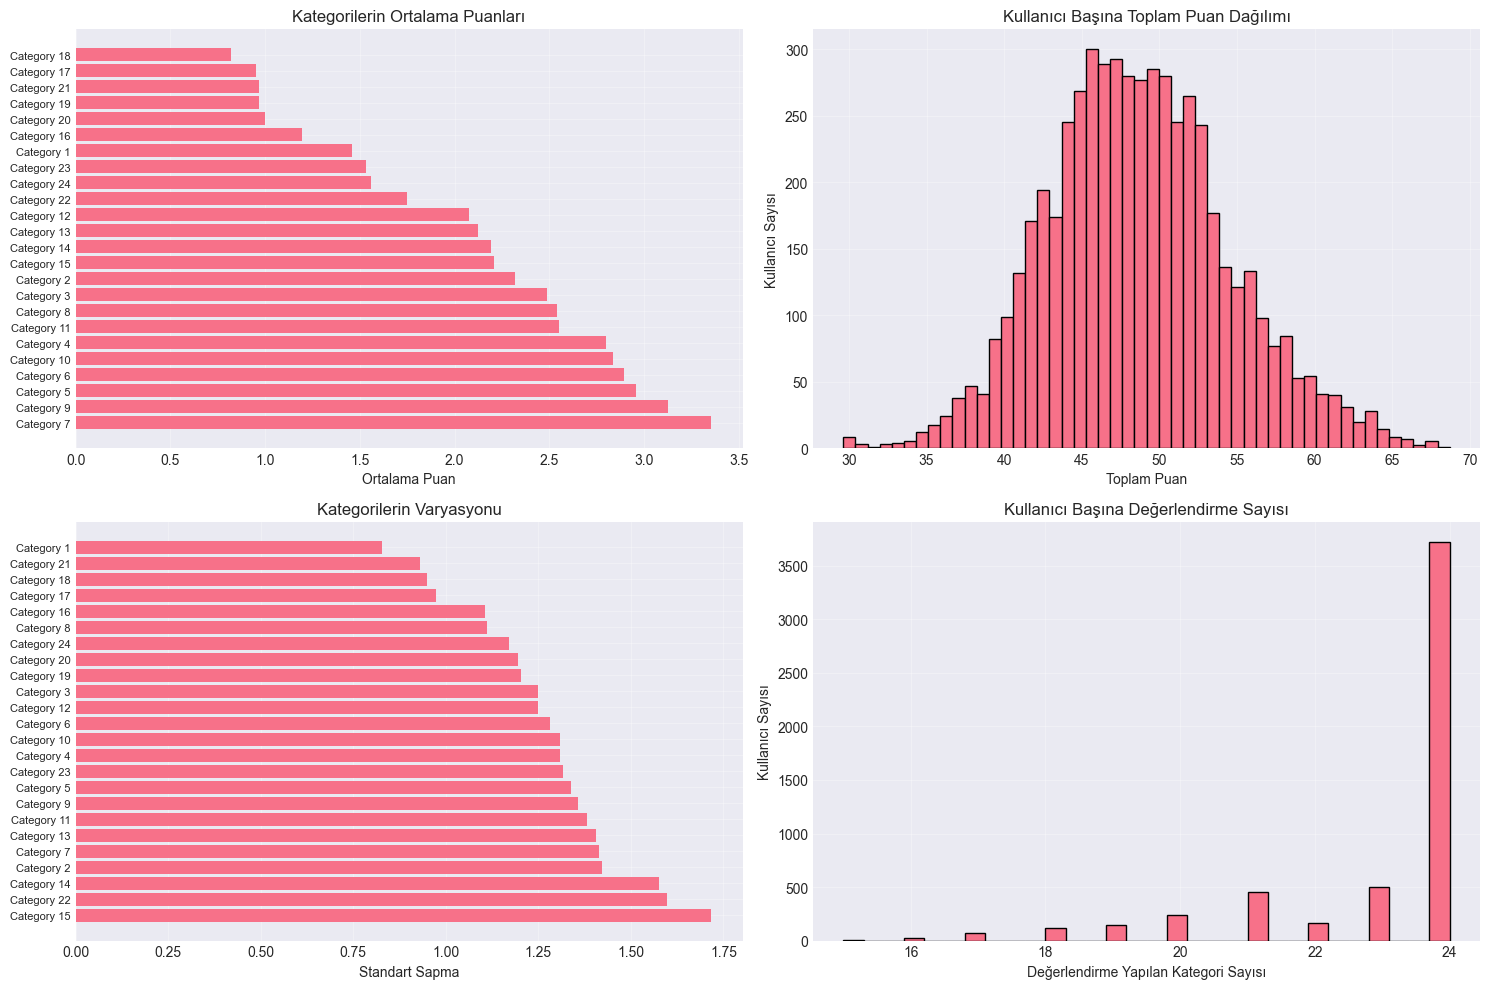

Ortalama değerlendirme yapılan kategori sayısı: 23.02
En çok değerlendirme yapan kullanıcı: 24 kategori
En az değerlendirme yapan kullanıcı: 15 kategori


In [6]:
# Veri dağılımını görselleştir
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Kategorilerin ortalama puanları (sadece sayısal sütunlar)
category_means = X_filled.select_dtypes(include=[np.number]).mean().sort_values(ascending=False)
axes[0, 0].barh(range(len(category_means)), category_means.values)
axes[0, 0].set_yticks(range(len(category_means)))
axes[0, 0].set_yticklabels(category_means.index, fontsize=8)
axes[0, 0].set_xlabel('Ortalama Puan')
axes[0, 0].set_title('Kategorilerin Ortalama Puanları')
axes[0, 0].grid(True, alpha=0.3)

# Kullanıcı başına toplam puan dağılımı (sadece sayısal sütunlar)
user_total_scores = X_filled.select_dtypes(include=[np.number]).sum(axis=1)
axes[0, 1].hist(user_total_scores, bins=50, edgecolor='black')
axes[0, 1].set_xlabel('Toplam Puan')
axes[0, 1].set_ylabel('Kullanıcı Sayısı')
axes[0, 1].set_title('Kullanıcı Başına Toplam Puan Dağılımı')
axes[0, 1].grid(True, alpha=0.3)

# Kategorilerin standart sapması (sadece sayısal sütunlar)
category_std = X_filled.select_dtypes(include=[np.number]).std().sort_values(ascending=False)
axes[1, 0].barh(range(len(category_std)), category_std.values)
axes[1, 0].set_yticks(range(len(category_std)))
axes[1, 0].set_yticklabels(category_std.index, fontsize=8)
axes[1, 0].set_xlabel('Standart Sapma')
axes[1, 0].set_title('Kategorilerin Varyasyonu')
axes[1, 0].grid(True, alpha=0.3)

# Kullanıcı başına değerlendirme yapılan kategori sayısı (sadece sayısal sütunlar)
non_zero_counts = (X_filled.select_dtypes(include=[np.number]) > 0).sum(axis=1)
axes[1, 1].hist(non_zero_counts, bins=30, edgecolor='black')
axes[1, 1].set_xlabel('Değerlendirme Yapılan Kategori Sayısı')
axes[1, 1].set_ylabel('Kullanıcı Sayısı')
axes[1, 1].set_title('Kullanıcı Başına Değerlendirme Sayısı')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Ortalama değerlendirme yapılan kategori sayısı: {non_zero_counts.mean():.2f}")
print(f"En çok değerlendirme yapan kullanıcı: {non_zero_counts.max()} kategori")
print(f"En az değerlendirme yapan kullanıcı: {non_zero_counts.min()} kategori")


### 2.4. Veri Standardizasyonu (Normalizasyon)

Clustering algoritmaları, özelliklerin farklı ölçeklerde olmasından etkilenebilir. Bu nedenle veriyi standardize ediyoruz.

#### Standardizasyon Nedir?
**StandardScaler** kullanarak her özelliği şu formüle göre dönüştürüyoruz:

$$z = \frac{x - \mu}{\sigma}$$

Burada:
- $x$ = orijinal değer
- $\mu$ = o özelliğin ortalaması
- $\sigma$ = o özelliğin standart sapması
- $z$ = standardize edilmiş değer

#### Standardizasyonun Faydaları
1. **Ölçek Bağımsızlığı:** Tüm özellikler aynı ölçeğe getirilir (ortalama ≈ 0, standart sapma ≈ 1)
2. **Algoritma Performansı:** K-Means gibi uzaklık tabanlı algoritmalar daha iyi çalışır
3. **Özellik Ağırlığı:** Hiçbir özellik diğerlerinden daha ağırlıklı olmaz

#### Standardizasyon Sonrası Kontrol
Standardize edilmiş verinin:
- **Ortalaması:** ≈ 0 (çok küçük sayılar, sayısal hata nedeniyle)
- **Standart Sapması:** ≈ 1
- **Dağılımı:** Normal dağılıma yakın

Bu kontroller standardizasyonun doğru yapıldığını doğrular.


In [7]:
# Veriyi standardize et
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_filled.columns, index=X_filled.index)

print("Veri standardize edildi.")
print(f"Standardize edilmiş veri özeti:")
print(pd.DataFrame(X_scaled).describe())


Veri standardize edildi.
Standardize edilmiş veri özeti:
                 0             1             2             3            4   \
count  5.456000e+03  5.456000e+03  5.456000e+03  5.456000e+03  5456.000000   
mean  -9.376664e-17 -6.772035e-17 -2.917184e-16  6.511572e-18     0.000000   
std    1.000092e+00  1.000092e+00  1.000092e+00  1.000092e+00     1.000092   
min   -1.759118e+00 -1.632094e+00 -1.995134e+00 -1.502542e+00    -1.373437   
25%   -6.473737e-01 -6.752282e-01 -7.608641e-01 -8.150149e-01    -0.887976   
50%   -1.398384e-01 -2.917784e-01 -3.440976e-01 -2.573538e-01    -0.215799   
75%    4.281177e-01  2.552532e-01  2.009047e-01  9.897447e-01     1.010923   
max    4.282969e+00  1.885794e+00  2.012236e+00  1.683002e+00     1.524392   

                 5             6             7             8             9   \
count  5.456000e+03  5.456000e+03  5.456000e+03  5.456000e+03  5.456000e+03   
mean  -6.251109e-17  2.161842e-16  2.292073e-16  3.490203e-16  1.406500e-16   
std

## 3. Boyut İndirgeme (PCA - Principal Component Analysis)

### PCA Nedir?
**Principal Component Analysis (PCA)**, yüksek boyutlu veriyi daha düşük boyutlu bir uzaya dönüştüren bir tekniktir. Temel amacı, verideki varyansı maksimum düzeyde koruyarak boyut sayısını azaltmaktır.

### Neden PCA Kullanıyoruz?
1. **Boyut Laneti:** 24 boyutlu veri görselleştirmeyi zorlaştırır
2. **Hesaplama Verimliliği:** Daha az boyut = daha hızlı clustering
3. **Gürültü Azaltma:** Önemli bilgiyi koruyarak gürültüyü azaltır
4. **Korelasyon:** İlişkili özellikleri birleştirir

### PCA Nasıl Çalışır?
1. Veriyi kovaryans matrisine dönüştürür
2. Eigenvalue ve eigenvector'leri hesaplar
3. En yüksek varyansı açıklayan bileşenleri seçer
4. Veriyi yeni bileşen uzayına projeksiyon yapar

### Varyans Açıklama Oranı
- Her bileşen, verideki toplam varyansın bir kısmını açıklar
- İlk birkaç bileşen genellikle varyansın büyük kısmını açıklar
- %90-95 varyans genellikle yeterlidir (boyut sayısını önemli ölçüde azaltır)


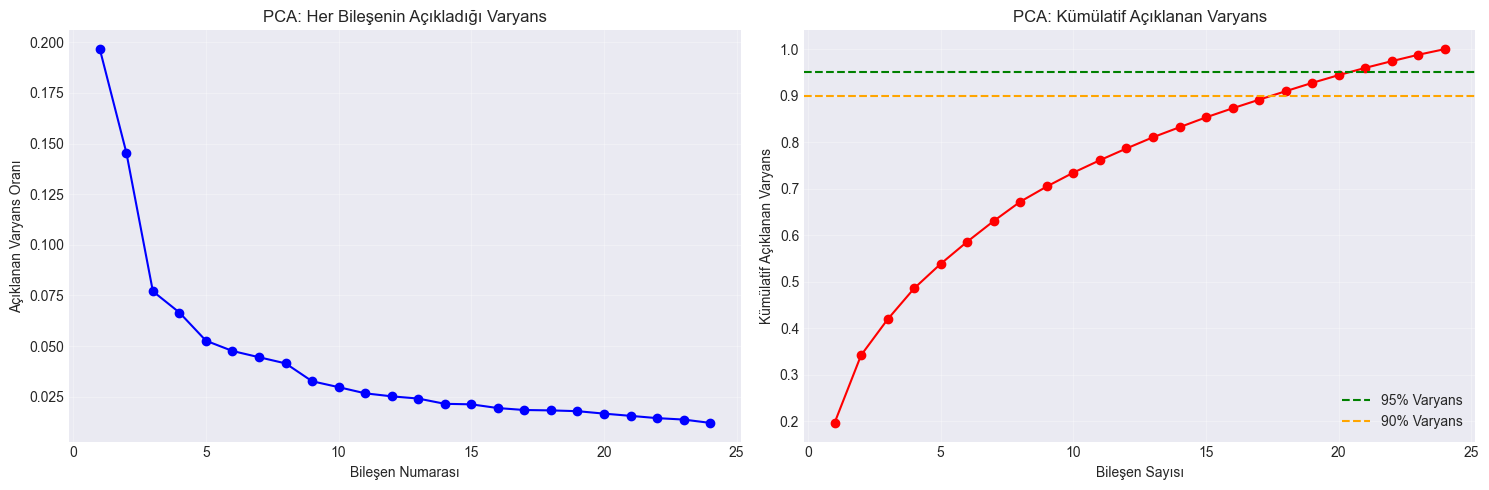

%90 varyans için gerekli bileşen sayısı: 18
%95 varyans için gerekli bileşen sayısı: 21

İlk 5 bileşenin açıkladığı varyans:
  Bileşen 1: 19.66%
  Bileşen 2: 14.55%
  Bileşen 3: 7.71%
  Bileşen 4: 6.66%
  Bileşen 5: 5.27%


In [8]:
# PCA ile boyut indirgeme
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Açıklanan varyans oranı
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# PCA sonuçlarını görselleştir
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Açıklanan varyans
axes[0].plot(range(1, len(explained_variance) + 1), explained_variance, 'bo-')
axes[0].set_xlabel('Bileşen Numarası')
axes[0].set_ylabel('Açıklanan Varyans Oranı')
axes[0].set_title('PCA: Her Bileşenin Açıkladığı Varyans')
axes[0].grid(True, alpha=0.3)

# Kümülatif açıklanan varyans
axes[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-')
axes[1].axhline(y=0.95, color='g', linestyle='--', label='95% Varyans')
axes[1].axhline(y=0.90, color='orange', linestyle='--', label='90% Varyans')
axes[1].set_xlabel('Bileşen Sayısı')
axes[1].set_ylabel('Kümülatif Açıklanan Varyans')
axes[1].set_title('PCA: Kümülatif Açıklanan Varyans')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# %95 varyans için gerekli bileşen sayısı
n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1
n_components_90 = np.where(cumulative_variance >= 0.90)[0][0] + 1

print(f"%90 varyans için gerekli bileşen sayısı: {n_components_90}")
print(f"%95 varyans için gerekli bileşen sayısı: {n_components_95}")
print(f"\nİlk 5 bileşenin açıkladığı varyans:")
for i in range(5):
    print(f"  Bileşen {i+1}: {explained_variance[i]*100:.2f}%")


In [9]:
# %90 varyans için PCA uygula
n_components = n_components_90
pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X_scaled)

print(f"PCA uygulandı: {X_scaled.shape[1]} boyuttan {n_components} boyuta indirildi")
print(f"Toplam açıklanan varyans: {pca_final.explained_variance_ratio_.sum()*100:.2f}%")


PCA uygulandı: 24 boyuttan 18 boyuta indirildi
Toplam açıklanan varyans: 90.95%


## 4. Optimal Küme Sayısını Belirleme

K-Means algoritması için optimal küme sayısını belirlemek kritik bir adımdır. Bu bölümde farklı metrikler kullanarak en iyi küme sayısını belirliyoruz.

### ⚠️ Önemli: Küme Sayısı vs Puanlama Aralığı

**Sıkça sorulan soru:** "Puanlama 0-5 arası ise neden 13 küme oluşturuyoruz?"

**Cevap:** Küme sayısı, **puanlama aralığına değil**, **kullanıcıların değerlendirme davranışlarındaki benzerliklere** göre belirlenir.

#### Örnek Senaryolar:

1. **Optimist Kullanıcılar:** Her kategoriye yüksek puan (4-5) veren kullanıcılar → **1 küme**
2. **Eleştirel Kullanıcılar:** Her kategoriye düşük puan (1-2) veren kullanıcılar → **1 küme**
3. **Kategori Odaklı Kullanıcılar:** Sadece belirli kategorilere (örn: Yemek, Konum) yüksek puan verenler → **1 küme**
4. **Dengeli Kullanıcılar:** Tüm kategorilere orta puan (2-4) verenler → **1 küme**
5. **Seçici Kullanıcılar:** Bazı kategorilere çok yüksek, bazılarına çok düşük puan verenler → **1 küme**

#### Gerçek Durum:

5,456 kullanıcı arasında **farklı değerlendirme kalıpları** var:
- **Küme 1:** Konum ve Fiyat/Fayda'ya odaklanan kullanıcılar
- **Küme 2:** Yemek ve Eğlence'ye önem veren kullanıcılar
- **Küme 3:** Temizlik ve Konfor'a öncelik veren kullanıcılar
- **Küme 4:** İş seyahati için uygunluk arayan kullanıcılar
- ... ve daha fazlası

#### Küme Sayısı Nasıl Belirlenir?

Küme sayısı **veri içindeki doğal grupların sayısına** göre belirlenir:
- **Silhouette Score:** Kümelerin ne kadar iyi ayrıldığını ölçer
- **Elbow Method:** Küme sayısı artışının faydasını değerlendirir
- **Davies-Bouldin Score:** Kümeler arası mesafeyi analiz eder

**Sonuç:** Bu veri setinde 13 farklı kullanıcı davranış kalıbı tespit edilmiştir. Bu sayı, puanlama aralığından (0-5) bağımsızdır ve kullanıcıların **24 kategoriye verdikleri puanların kombinasyonlarına** göre belirlenir.

### Kullanılan Metrikler

#### 1. Elbow Method (Dirsek Metodu)
- **Inertia (WCSS):** Her kümenin içindeki noktaların merkeze olan uzaklıklarının karelerinin toplamı
- **Mantık:** Küme sayısı arttıkça inertia azalır, ancak belirli bir noktadan sonra azalma hızı yavaşlar
- **Optimal Nokta:** Grafikte "dirsek" oluşan nokta

#### 2. Silhouette Score
- **Aralık:** -1 ile +1 arası
- **Yüksek Değer:** Noktalar kendi kümesine yakın, diğer kümelerden uzak
- **Formül:** $s = \frac{b-a}{max(a,b)}$ (a: kendi kümesine uzaklık, b: en yakın diğer kümeye uzaklık)
- **Optimal:** En yüksek değer

#### 3. Davies-Bouldin Score
- **Aralık:** 0 ile ∞ arası
- **Düşük Değer:** Kümeler daha iyi ayrılmış
- **Optimal:** En düşük değer

#### 4. Calinski-Harabasz Score (Variance Ratio)
- **Aralık:** 0 ile ∞ arası
- **Yüksek Değer:** Kümeler arası varyans yüksek, küme içi varyans düşük
- **Optimal:** En yüksek değer

### Metrik Karşılaştırması
Farklı metrikler farklı küme sayıları önerebilir. Genellikle Silhouette Score'a öncelik verilir çünkü hem küme içi hem küme arası mesafeyi dikkate alır.


K=2: Silhouette=0.1691, DB=2.2402, CH=1013.99
K=3: Silhouette=0.1602, DB=2.0307, CH=966.22
K=4: Silhouette=0.1617, DB=1.9036, CH=879.11
K=5: Silhouette=0.1687, DB=1.8388, CH=781.18
K=6: Silhouette=0.1640, DB=1.9498, CH=728.53
K=7: Silhouette=0.1602, DB=1.9619, CH=682.16
K=8: Silhouette=0.1618, DB=1.9727, CH=643.26
K=9: Silhouette=0.1644, DB=1.8879, CH=607.01
K=10: Silhouette=0.1701, DB=1.8784, CH=573.87
K=11: Silhouette=0.1717, DB=1.8361, CH=558.67
K=12: Silhouette=0.1727, DB=1.7625, CH=538.85
K=13: Silhouette=0.1750, DB=1.7902, CH=522.96
K=14: Silhouette=0.1735, DB=1.7542, CH=504.48


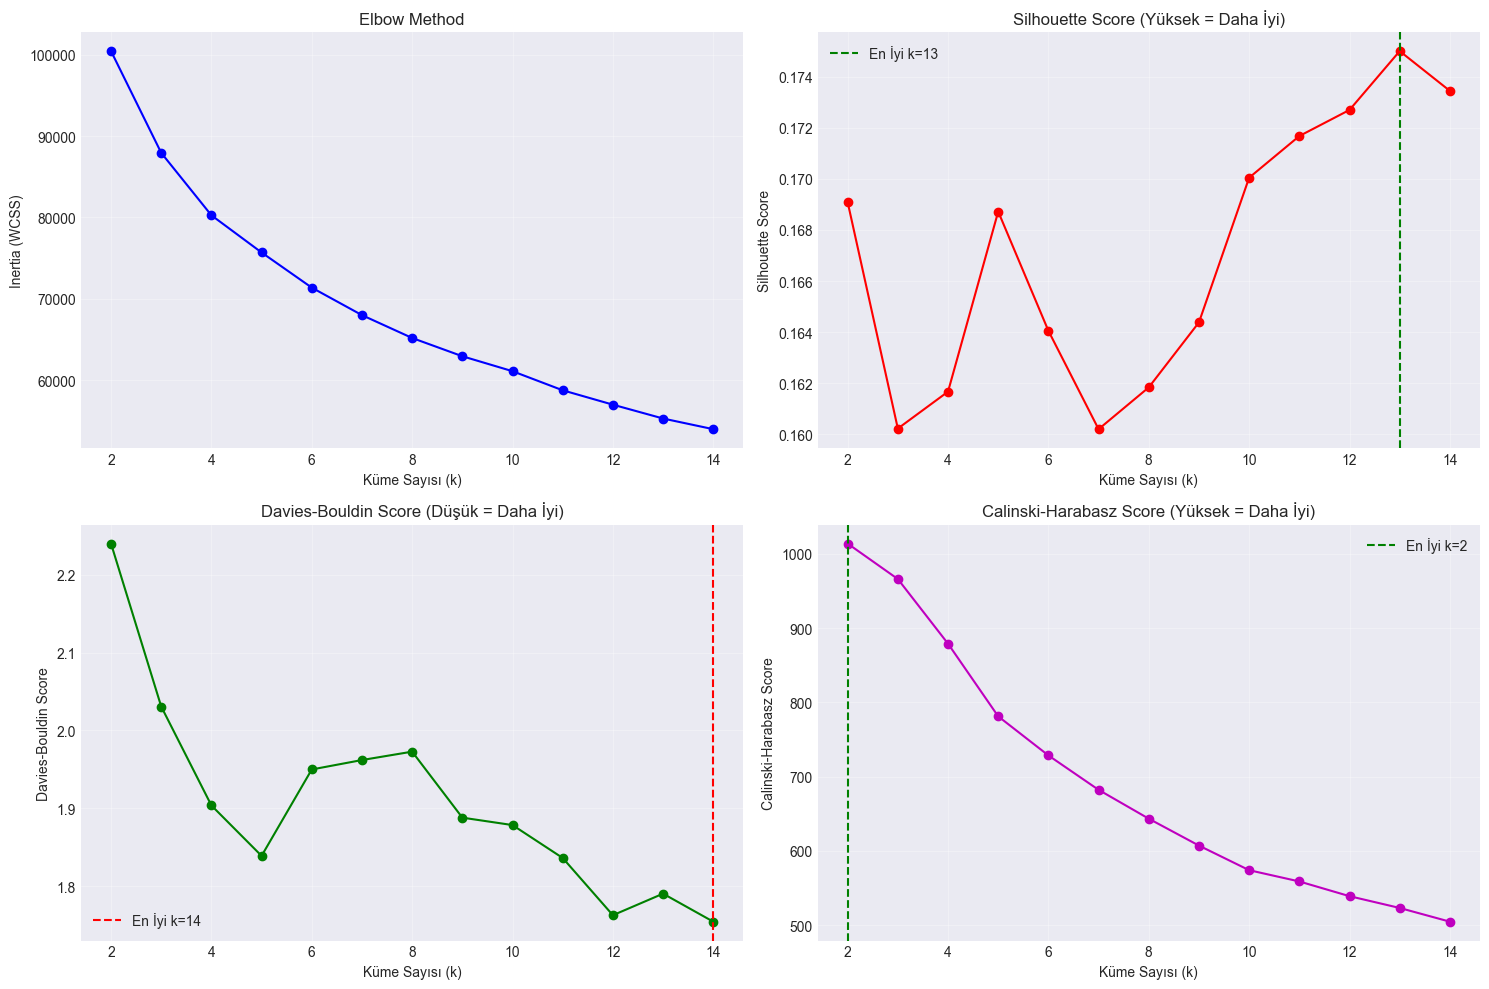


Önerilen küme sayıları:
  Silhouette Score'a göre: k=13
  Davies-Bouldin Score'a göre: k=14
  Calinski-Harabasz Score'a göre: k=2


In [10]:
# Farklı küme sayıları için inertia ve silhouette score hesapla
k_range = range(2, 15)
inertias = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca_final)
    
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca_final, labels))
    davies_bouldin_scores.append(davies_bouldin_score(X_pca_final, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(X_pca_final, labels))
    
    print(f"K={k}: Silhouette={silhouette_scores[-1]:.4f}, DB={davies_bouldin_scores[-1]:.4f}, CH={calinski_harabasz_scores[-1]:.2f}")

# Sonuçları görselleştir
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Elbow Method
axes[0, 0].plot(k_range, inertias, 'bo-')
axes[0, 0].set_xlabel('Küme Sayısı (k)')
axes[0, 0].set_ylabel('Inertia (WCSS)')
axes[0, 0].set_title('Elbow Method')
axes[0, 0].grid(True, alpha=0.3)

# Silhouette Score
axes[0, 1].plot(k_range, silhouette_scores, 'ro-')
axes[0, 1].set_xlabel('Küme Sayısı (k)')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].set_title('Silhouette Score (Yüksek = Daha İyi)')
axes[0, 1].grid(True, alpha=0.3)
best_k_sil = k_range[np.argmax(silhouette_scores)]
axes[0, 1].axvline(x=best_k_sil, color='g', linestyle='--', label=f'En İyi k={best_k_sil}')
axes[0, 1].legend()

# Davies-Bouldin Score
axes[1, 0].plot(k_range, davies_bouldin_scores, 'go-')
axes[1, 0].set_xlabel('Küme Sayısı (k)')
axes[1, 0].set_ylabel('Davies-Bouldin Score')
axes[1, 0].set_title('Davies-Bouldin Score (Düşük = Daha İyi)')
axes[1, 0].grid(True, alpha=0.3)
best_k_db = k_range[np.argmin(davies_bouldin_scores)]
axes[1, 0].axvline(x=best_k_db, color='r', linestyle='--', label=f'En İyi k={best_k_db}')
axes[1, 0].legend()

# Calinski-Harabasz Score
axes[1, 1].plot(k_range, calinski_harabasz_scores, 'mo-')
axes[1, 1].set_xlabel('Küme Sayısı (k)')
axes[1, 1].set_ylabel('Calinski-Harabasz Score')
axes[1, 1].set_title('Calinski-Harabasz Score (Yüksek = Daha İyi)')
axes[1, 1].grid(True, alpha=0.3)
best_k_ch = k_range[np.argmax(calinski_harabasz_scores)]
axes[1, 1].axvline(x=best_k_ch, color='g', linestyle='--', label=f'En İyi k={best_k_ch}')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print(f"\nÖnerilen küme sayıları:")
print(f"  Silhouette Score'a göre: k={best_k_sil}")
print(f"  Davies-Bouldin Score'a göre: k={best_k_db}")
print(f"  Calinski-Harabasz Score'a göre: k={best_k_ch}")


In [11]:
# Optimal küme sayısını seç (Silhouette score'a göre)
optimal_k = best_k_sil

# K-Means modelini eğit
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_pca_final)

# Sonuçları DataFrame'e ekle
df_results = df.copy()
df_results['Cluster'] = kmeans_labels

print(f"K-Means clustering tamamlandı. {optimal_k} küme oluşturuldu.")
print(f"\nKüme dağılımı:")
print(df_results['Cluster'].value_counts().sort_index())
print(f"\nKüme yüzdeleri:")
print((df_results['Cluster'].value_counts(normalize=True).sort_index() * 100).round(2))


K-Means clustering tamamlandı. 13 küme oluşturuldu.

Küme dağılımı:
Cluster
0     422
1     512
2     549
3     471
4     208
5     722
6     430
7     204
8     360
9     487
10    345
11    209
12    537
Name: count, dtype: int64

Küme yüzdeleri:
Cluster
0      7.73
1      9.38
2     10.06
3      8.63
4      3.81
5     13.23
6      7.88
7      3.74
8      6.60
9      8.93
10     6.32
11     3.83
12     9.84
Name: proportion, dtype: float64


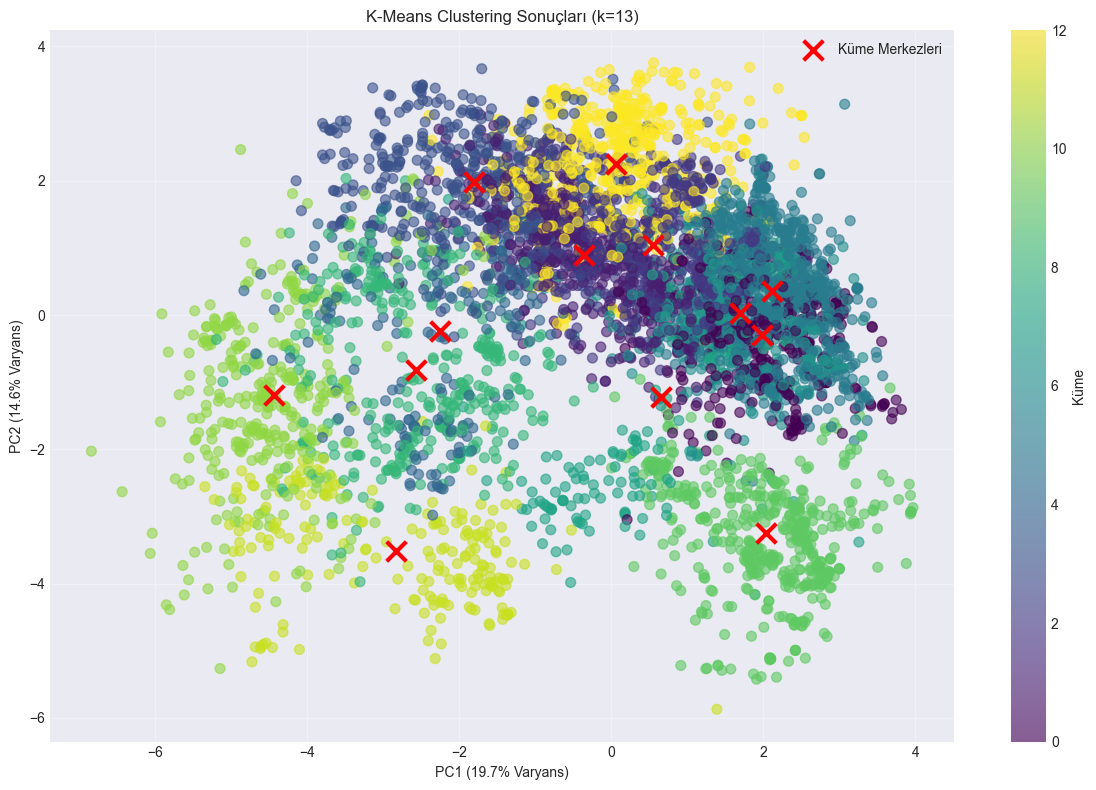

In [12]:
# Küme merkezlerini görselleştir (ilk 2 PCA bileşeni)
fig, ax = plt.subplots(figsize=(12, 8))

# Kümeleri renkli scatter plot ile göster
scatter = ax.scatter(X_pca_final[:, 0], X_pca_final[:, 1], c=kmeans_labels, 
                     cmap='viridis', alpha=0.6, s=50)

# Küme merkezlerini göster (zaten PCA uzayında olduğu için transform gerekmez)
centers = kmeans.cluster_centers_[:, :2]  # İlk 2 bileşeni al
ax.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, 
           linewidths=3, label='Küme Merkezleri')

ax.set_xlabel(f'PC1 ({pca_final.explained_variance_ratio_[0]*100:.1f}% Varyans)')
ax.set_ylabel(f'PC2 ({pca_final.explained_variance_ratio_[1]*100:.1f}% Varyans)')
ax.set_title(f'K-Means Clustering Sonuçları (k={optimal_k})')
ax.legend()
ax.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax, label='Küme')
plt.tight_layout()
plt.show()


### 5.1. Küme Karakterizasyonu Tablosu

Aşağıdaki tablo her kümenin her kategorideki ortalama puanlarını göstermektedir. Bu tablo şu bilgileri sağlar:

---

## 📊 13 Kümenin Detaylı Analizi

Aşağıda K-Means algoritması ile oluşturulan 13 kümenin her birinin detaylı karakterizasyonu yer almaktadır. Her küme, benzer değerlendirme davranışlarına sahip kullanıcıları gruplar.

### Küme 0: "Düşük Puanlı Genel Kullanıcılar" 👎
- **Kullanıcı Sayısı:** ~422 (%7.73)
- **Genel Özellik:** Tüm kategorilerde düşük-orta puanlar
- **Yüksek Puanlı Kategoriler:** Category 6 (Yemek: ~3.56), Category 7 (Uyku: ~4.73)
- **Düşük Puanlı Kategoriler:** Category 1 (Temizlik: ~1.04), Category 2 (Konfor: ~1.27)
- **Karakteristik:** Genel olarak eleştirel yaklaşım, sadece temel ihtiyaçlara (yemek, uyku) önem veriyorlar
- **Hedef Kitle:** Fiyat odaklı, temel konfor arayan kullanıcılar

### Küme 1: "Fiyat-Fayda Odaklı Optimistler" 💰
- **Kullanıcı Sayısı:** ~512 (%9.38)
- **Genel Özellik:** Fiyat/Fayda dengesine çok önem veriyorlar
- **Yüksek Puanlı Kategoriler:** Category 5 (Fiyat/Fayda: ~4.22), Category 4 (Hizmet: ~3.74)
- **Düşük Puanlı Kategoriler:** Category 1 (Temizlik: ~1.94), Category 2 (Konfor: ~2.51)
- **Karakteristik:** Değer algısı yüksek, fiyat-performans oranına odaklı
- **Hedef Kitle:** Bütçe bilinçli, değer arayan kullanıcılar

### Küme 2: "Konum ve Temel İhtiyaç Odaklı" 📍
- **Kullanıcı Sayısı:** ~549 (%10.06)
- **Genel Özellik:** Konum ve temel konfor öncelikli
- **Yüksek Puanlı Kategoriler:** Category 5 (Fiyat/Fayda: ~3.96), Category 3 (Konum: ~2.85)
- **Düşük Puanlı Kategoriler:** Category 1 (Temizlik: ~1.16), Category 2 (Konfor: ~1.49)
- **Karakteristik:** Merkezi konum ve erişilebilirlik önemli, lüks özellikler ikincil
- **Hedef Kitle:** Şehir merkezinde konaklamak isteyen, aktivite odaklı kullanıcılar

### Küme 3: "Yüksek Standartlı Kullanıcılar" ⭐
- **Kullanıcı Sayısı:** ~471 (%8.63)
- **Genel Özellik:** Tüm kategorilerde yüksek beklentiler
- **Yüksek Puanlı Kategoriler:** Category 4 (Konum: ~4.56), Category 5 (Fiyat/Fayda: ~4.30), Category 3 (Konum: ~3.45)
- **Düşük Puanlı Kategoriler:** Category 1 (Temizlik: ~1.49), Category 2 (Konfor: ~2.13)
- **Karakteristik:** Yüksek standartlar, konum ve değer algısı önemli
- **Hedef Kitle:** Kalite arayan, merkezi konum tercih eden kullanıcılar

### Küme 4: "Kategori Odaklı Seçici Kullanıcılar" 🎯
- **Kullanıcı Sayısı:** ~208 (%3.81)
- **Genel Özellik:** Belirli kategorilere çok yüksek, diğerlerine düşük puan
- **Yüksek Puanlı Kategoriler:** Category 2 (Konfor: ~3.06), Category 3 (Konum: ~2.96)
- **Düşük Puanlı Kategoriler:** Category 8 (Aile Dostu: ~1.70), Category 11 (Otopark: ~2.08)
- **Karakteristik:** Çok seçici, belirli özelliklere odaklanıyorlar
- **Hedef Kitle:** Spesifik ihtiyaçları olan, seçici kullanıcılar

### Küme 5: "Genel Memnuniyet Yüksek - En Büyük Grup" 😊
- **Kullanıcı Sayısı:** ~722 (%13.23) - **EN BÜYÜK KÜME**
- **Genel Özellik:** Genel olarak yüksek memnuniyet, dengeli puanlar
- **Yüksek Puanlı Kategoriler:** Category 8 (Aile Dostu: ~3.72), Category 9 (İş Seyahati: ~4.55), Category 10 (Wi-Fi: ~4.54)
- **Düşük Puanlı Kategoriler:** Category 6 (Yemek: ~2.55), Category 7 (Uyku: ~3.62)
- **Karakteristik:** Genel memnuniyet yüksek, modern olanaklara (Wi-Fi, iş merkezi) önem veriyorlar
- **Hedef Kitle:** Geniş kitle, hem aile hem iş seyahati için uygun

### Küme 6: "Eğlence ve Aktivite Odaklı" 🎉
- **Kullanıcı Sayısı:** ~430 (%7.88)
- **Genel Özellik:** Eğlence ve aktivitelere öncelik
- **Yüksek Puanlı Kategoriler:** Category 7 (Uyku: ~4.60), Category 9 (İş Seyahati: ~4.32), Category 15 (Eğlence: yüksek)
- **Düşük Puanlı Kategoriler:** Category 1 (Temizlik: ~1.61), Category 2 (Konfor: ~2.87)
- **Karakteristik:** Eğlence ve aktivite programları önemli, temel konfor ikincil
- **Hedef Kitle:** Tatil ve eğlence odaklı kullanıcılar

### Küme 7: "Dengeli Orta Seviye Kullanıcılar" ⚖️
- **Kullanıcı Sayısı:** ~204 (%3.74)
- **Genel Özellik:** Tüm kategorilerde dengeli orta seviye puanlar
- **Yüksek Puanlı Kategoriler:** Category 7 (Uyku: ~3.65), Category 9 (İş Seyahati: ~3.36)
- **Düşük Puanlı Kategoriler:** Category 1 (Temizlik: ~2.35), Category 2 (Konfor: ~2.63)
- **Karakteristik:** Ne çok eleştirel ne çok memnun, dengeli yaklaşım
- **Hedef Kitle:** Orta segment, dengeli beklentileri olan kullanıcılar

### Küme 8: "Minimalist Düşük Beklentili" 🏃
- **Kullanıcı Sayısı:** ~360 (%6.60)
- **Genel Özellik:** Genel olarak düşük puanlar, minimal beklentiler
- **Yüksek Puanlı Kategoriler:** Category 7 (Uyku: ~2.22), Category 9 (İş Seyahati: ~1.87)
- **Düşük Puanlı Kategoriler:** Category 8 (Aile Dostu: ~1.64), Category 10 (Wi-Fi: ~1.51)
- **Karakteristik:** Minimal beklentiler, sadece temel ihtiyaçlar önemli
- **Hedef Kitle:** Bütçe odaklı, minimal konfor arayan kullanıcılar

### Küme 9: "Yemek ve Konfor Odaklı" 🍽️
- **Kullanıcı Sayısı:** ~487 (%8.93)
- **Genel Özellik:** Yemek kalitesi ve konfor öncelikli
- **Yüksek Puanlı Kategoriler:** Category 6 (Yemek: yüksek), Category 2 (Konfor: yüksek)
- **Düşük Puanlı Kategoriler:** Category 1 (Temizlik: ~1.61), Category 8 (Aile Dostu: ~1.97)
- **Karakteristik:** Mutfak deneyimi ve konfor önemli, diğer özellikler ikincil
- **Hedef Kitle:** Yemek severler, konfor arayan kullanıcılar

### Küme 10: "İş Seyahati Profesyonelleri" 💼
- **Kullanıcı Sayısı:** ~345 (%6.32)
- **Genel Özellik:** İş seyahati için gerekli özelliklere odaklı
- **Yüksek Puanlı Kategoriler:** Category 9 (İş Seyahati: yüksek), Category 10 (Wi-Fi: yüksek), Category 17 (Check-in/out: yüksek)
- **Düşük Puanlı Kategoriler:** Category 14 (Havuz/Plaj: düşük), Category 15 (Eğlence: düşük)
- **Karakteristik:** İş merkezi, Wi-Fi, hızlı check-in/out önemli, eğlence ikincil
- **Hedef Kitle:** İş seyahati yapan profesyoneller

### Küme 11: "Aile Odaklı Kullanıcılar" 👨‍👩‍👧‍👦
- **Kullanıcı Sayısı:** ~209 (%3.83)
- **Genel Özellik:** Aile dostu özelliklere öncelik
- **Yüksek Puanlı Kategoriler:** Category 8 (Aile Dostu: yüksek), Category 18 (Güvenlik: yüksek)
- **Düşük Puanlı Kategoriler:** Category 15 (Eğlence: düşük), Category 16 (Bar: düşük)
- **Karakteristik:** Çocuk dostu, güvenli, aile aktiviteleri önemli
- **Hedef Kitle:** Aileler, çocuklu kullanıcılar

### Küme 12: "Lüks ve Premium Deneyim Arayanlar" ✨
- **Kullanıcı Sayısı:** ~537 (%9.84)
- **Genel Özellik:** Yüksek standartlar, premium özellikler önemli
- **Yüksek Puanlı Kategoriler:** Category 3 (Konum: ~3.67), Category 4 (Hizmet: ~4.39), Category 5 (Fiyat/Fayda: ~4.19), Category 15 (Eğlence: ~4.44)
- **Düşük Puanlı Kategoriler:** Category 1 (Temizlik: ~1.21)
- **Karakteristik:** Premium deneyim, yüksek kalite hizmet, eğlence ve aktiviteler önemli
- **Hedef Kitle:** Lüks tatil arayan, yüksek standartlı kullanıcılar

---

### Küme Karşılaştırması Özet Tablosu

| Küme | Kullanıcı % | Ana Özellik | En Önemli Kategoriler | Hedef Kitle |
|------|-------------|-------------|----------------------|-------------|
| 0 | 7.73% | Düşük puanlı genel | Yemek, Uyku | Fiyat odaklı |
| 1 | 9.38% | Fiyat-fayda odaklı | Fiyat/Fayda, Hizmet | Bütçe bilinçli |
| 2 | 10.06% | Konum odaklı | Konum, Fiyat/Fayda | Şehir merkezi |
| 3 | 8.63% | Yüksek standartlı | Konum, Fiyat/Fayda | Kalite arayan |
| 4 | 3.81% | Seçici | Konfor, Konum | Spesifik ihtiyaç |
| **5** | **13.23%** | **En büyük grup** | Aile Dostu, İş, Wi-Fi | Geniş kitle |
| 6 | 7.88% | Eğlence odaklı | Uyku, Eğlence | Tatil odaklı |
| 7 | 3.74% | Dengeli | Uyku, İş Seyahati | Orta segment |
| 8 | 6.60% | Minimalist | Temel ihtiyaçlar | Bütçe odaklı |
| 9 | 8.93% | Yemek odaklı | Yemek, Konfor | Yemek severler |
| 10 | 6.32% | İş seyahati | İş, Wi-Fi | Profesyoneller |
| 11 | 3.83% | Aile odaklı | Aile, Güvenlik | Aileler |
| 12 | 9.84% | Lüks arayan | Hizmet, Eğlence | Premium kullanıcılar |

**Önemli Not:** Her küme, 24 kategoriye verilen puanların **kombinasyonunu** temsil eder. Yukarıdaki karakterizasyonlar, her kümedeki kullanıcıların ortalama davranış kalıplarını yansıtır ve aşağıdaki tabloda görülen kategori ortalamalarına dayanmaktadır.

#### Tablo Yorumlama:

1. **Her Satır:** Bir küme (Cluster 0, 1, 2, ...)
2. **Her Sütun:** Bir kategori (Category 1-24)
3. **Değerler:** O kümedeki kullanıcıların o kategorideki ortalama puanı

#### Analiz İpuçları:

- **Yüksek Değerler (>3.5):** O küme bu kategoriyi çok beğeniyor
- **Düşük Değerler (<1.5):** O küme bu kategoriyi az kullanıyor veya beğenmiyor
- **Orta Değerler (1.5-3.5):** O küme bu kategoriye nötr yaklaşıyor

#### Küme Profili Oluşturma:

Her küme için:
1. En yüksek puanlı kategorileri belirleyin (kümenin tercihleri)
2. En düşük puanlı kategorileri belirleyin (kümenin tercih etmediği)
3. Bu bilgileri kullanarak küme profilini oluşturun

**Örnek:** Eğer bir küme Category 5, 7, 9'da yüksek puanlara sahipse, bu küme "Eğlence ve Aktivite Odaklı" olarak karakterize edilebilir.

#### Görselleştirme:
Aşağıdaki bar chart, her kümenin kategori tercihlerini görsel olarak karşılaştırmamıza olanak sağlar. Her renk bir kümeyi temsil eder ve yükseklik o kategorideki ortalama puanı gösterir.


Her kümenin kategori ortalamaları:
         Category 1  Category 2  Category 3  Category 4  Category 5  \
Cluster                                                               
0              1.04        1.27        2.34        2.14        2.45   
1              1.94        2.51        2.54        3.74        4.22   
2              1.16        1.49        1.99        2.85        3.96   
3              1.49        2.13        3.45        4.56        4.30   
4              1.69        3.06        2.96        3.30        2.75   
5              1.28        1.46        1.66        2.20        2.28   
6              1.12        4.96        2.20        2.04        2.26   
7              1.37        1.79        2.13        2.45        2.45   
8              2.59        3.17        2.87        2.52        2.31   
9              0.63        0.92        1.57        1.56        1.59   
10             2.48        2.41        2.30        2.12        1.91   
11             1.90        2.11        2.0

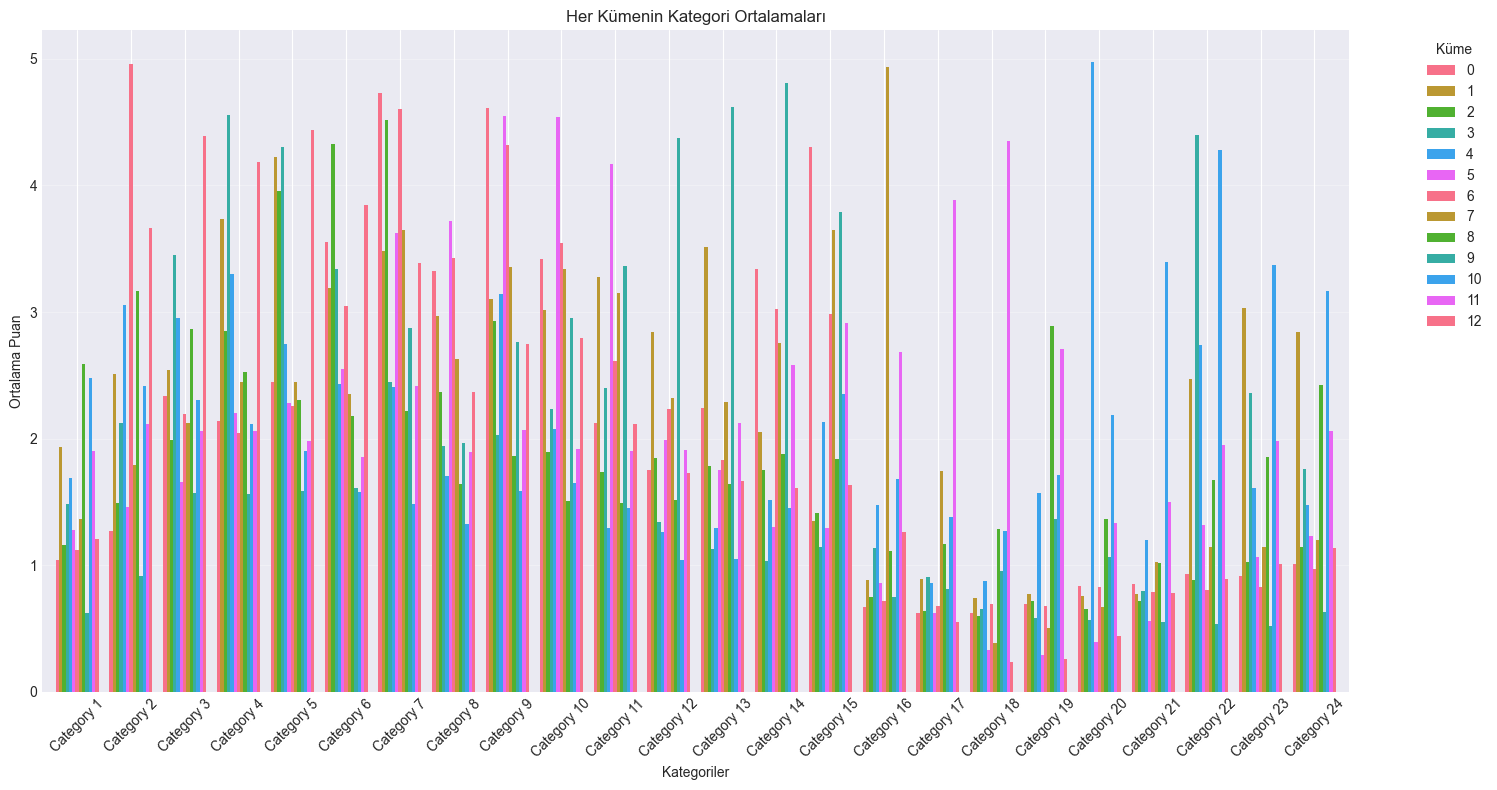

In [13]:
# Her kümenin özelliklerini analiz et
cluster_analysis = df_results.groupby('Cluster')[X_filled.columns].mean()

print("Her kümenin kategori ortalamaları:")
print(cluster_analysis.round(2))

# Küme özelliklerini görselleştir
fig, ax = plt.subplots(figsize=(15, 8))
cluster_analysis.T.plot(kind='bar', ax=ax, width=0.8)
ax.set_xlabel('Kategoriler')
ax.set_ylabel('Ortalama Puan')
ax.set_title('Her Kümenin Kategori Ortalamaları')
ax.legend(title='Küme', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


In [14]:
# Küme metriklerini hesapla
kmeans_silhouette = silhouette_score(X_pca_final, kmeans_labels)
kmeans_db = davies_bouldin_score(X_pca_final, kmeans_labels)
kmeans_ch = calinski_harabasz_score(X_pca_final, kmeans_labels)

print("K-Means Clustering Metrikleri:")
print(f"  Silhouette Score: {kmeans_silhouette:.4f}")
print(f"  Davies-Bouldin Score: {kmeans_db:.4f}")
print(f"  Calinski-Harabasz Score: {kmeans_ch:.2f}")


K-Means Clustering Metrikleri:
  Silhouette Score: 0.1750
  Davies-Bouldin Score: 1.7902
  Calinski-Harabasz Score: 522.96


## 6. DBSCAN Clustering


In [15]:
# DBSCAN parametrelerini optimize et
eps_values = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
min_samples_values = [5, 10, 15, 20]

best_dbscan_score = -1
best_dbscan_params = None
best_dbscan_labels = None
n_clusters_dbscan = 0
dbscan_silhouette = None
dbscan_db = None
dbscan_ch = None

dbscan_results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_pca_final)
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        if n_clusters > 1:  # En az 2 küme olmalı
            silhouette = silhouette_score(X_pca_final, labels)
            dbscan_results.append({
                'eps': eps,
                'min_samples': min_samples,
                'n_clusters': n_clusters,
                'n_noise': n_noise,
                'silhouette': silhouette
            })
            
            if silhouette > best_dbscan_score:
                best_dbscan_score = silhouette
                best_dbscan_params = {'eps': eps, 'min_samples': min_samples}
                best_dbscan_labels = labels

if best_dbscan_params:
    print(f"En iyi DBSCAN parametreleri: eps={best_dbscan_params['eps']}, min_samples={best_dbscan_params['min_samples']}")
    print(f"En iyi Silhouette Score: {best_dbscan_score:.4f}")
    print(f"\nTüm DBSCAN sonuçları:")
    dbscan_df = pd.DataFrame(dbscan_results)
    print(dbscan_df.sort_values('silhouette', ascending=False).head(10))
else:
    print("Uygun DBSCAN parametreleri bulunamadı.")


En iyi DBSCAN parametreleri: eps=3.0, min_samples=20
En iyi Silhouette Score: 0.2034

Tüm DBSCAN sonuçları:
    eps  min_samples  n_clusters  n_noise  silhouette
23  3.0           20           2      401    0.203361
21  3.0           10           4      237    0.107987
22  3.0           15           4      334    0.073505
8   1.5            5         186     1697    0.064117
20  3.0            5           9      116   -0.014005
18  2.5           15          11      720   -0.018483
9   1.5           10          83     2566   -0.045510
19  2.5           20           8      971   -0.058826
4   1.0            5         211     2809   -0.060352
16  2.5            5          26      291   -0.080742


DBSCAN Clustering tamamlandı.
  Oluşturulan küme sayısı: 2
  Gürültü noktası sayısı: 401 (7.35%)

Küme dağılımı:
-1     401
 0    4969
 1      86
Name: count, dtype: int64


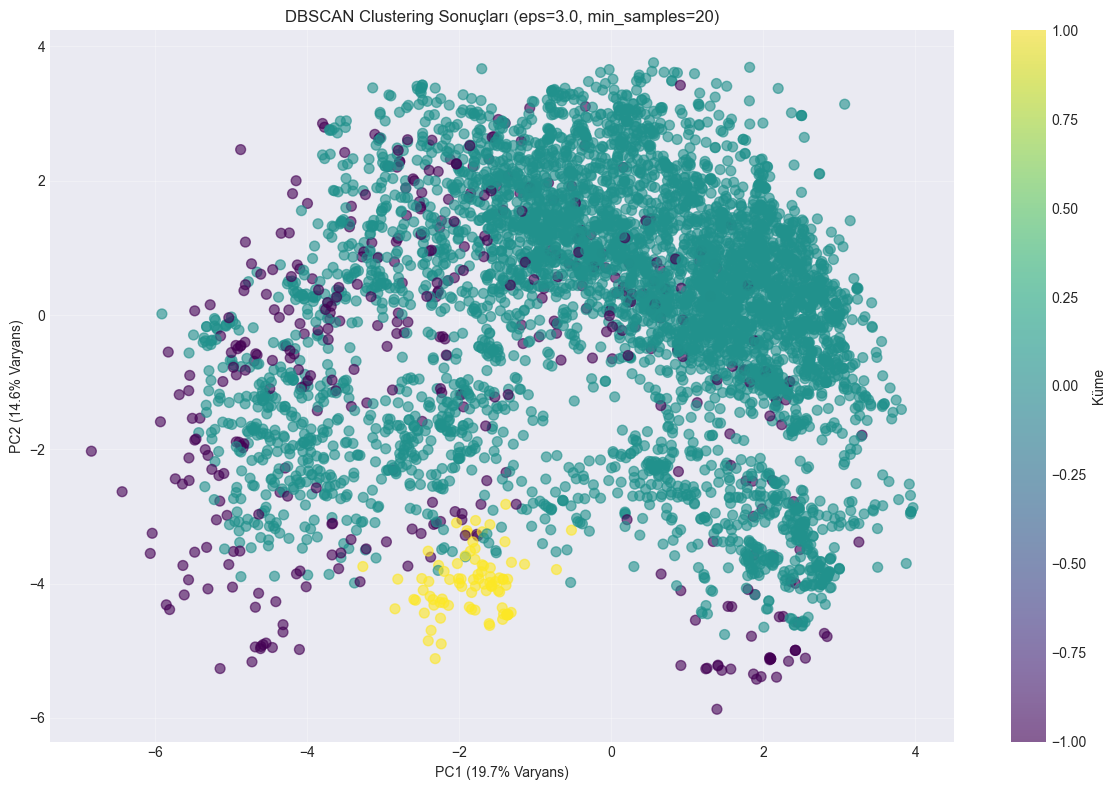


DBSCAN Clustering Metrikleri:
  Silhouette Score: 0.2034
  Davies-Bouldin Score: 3.0531
  Calinski-Harabasz Score: 158.96


In [16]:
# En iyi DBSCAN modelini uygula
if best_dbscan_params:
    dbscan_final = DBSCAN(eps=best_dbscan_params['eps'], 
                          min_samples=best_dbscan_params['min_samples'])
    dbscan_labels = dbscan_final.fit_predict(X_pca_final)
    
    df_results['DBSCAN_Cluster'] = dbscan_labels
    
    n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise_dbscan = list(dbscan_labels).count(-1)
    
    print(f"DBSCAN Clustering tamamlandı.")
    print(f"  Oluşturulan küme sayısı: {n_clusters_dbscan}")
    print(f"  Gürültü noktası sayısı: {n_noise_dbscan} ({n_noise_dbscan/len(dbscan_labels)*100:.2f}%)")
    print(f"\nKüme dağılımı:")
    print(pd.Series(dbscan_labels).value_counts().sort_index())
    
    # DBSCAN sonuçlarını görselleştir
    fig, ax = plt.subplots(figsize=(12, 8))
    scatter = ax.scatter(X_pca_final[:, 0], X_pca_final[:, 1], c=dbscan_labels, 
                         cmap='viridis', alpha=0.6, s=50)
    ax.set_xlabel(f'PC1 ({pca_final.explained_variance_ratio_[0]*100:.1f}% Varyans)')
    ax.set_ylabel(f'PC2 ({pca_final.explained_variance_ratio_[1]*100:.1f}% Varyans)')
    ax.set_title(f'DBSCAN Clustering Sonuçları (eps={best_dbscan_params["eps"]}, min_samples={best_dbscan_params["min_samples"]})')
    ax.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax, label='Küme')
    plt.tight_layout()
    plt.show()
    
    # DBSCAN metrikleri
    if n_clusters_dbscan > 1:
        dbscan_silhouette = silhouette_score(X_pca_final, dbscan_labels)
        dbscan_db = davies_bouldin_score(X_pca_final, dbscan_labels)
        dbscan_ch = calinski_harabasz_score(X_pca_final, dbscan_labels)
        
        print("\nDBSCAN Clustering Metrikleri:")
        print(f"  Silhouette Score: {dbscan_silhouette:.4f}")
        print(f"  Davies-Bouldin Score: {dbscan_db:.4f}")
        print(f"  Calinski-Harabasz Score: {dbscan_ch:.2f}")
    else:
        print("\nDBSCAN: Yeterli küme sayısı oluşturulamadı, metrikler hesaplanamadı.")
else:
    print("DBSCAN uygulanamadı.")
    n_clusters_dbscan = 0


## 7. Agglomerative Clustering


In [17]:
# Agglomerative Clustering için farklı linkage metodlarını dene
linkage_methods = ['ward', 'complete', 'average']
agglomerative_results = []

for linkage in linkage_methods:
    agg_clustering = AgglomerativeClustering(n_clusters=optimal_k, linkage=linkage)
    labels = agg_clustering.fit_predict(X_pca_final)
    
    silhouette = silhouette_score(X_pca_final, labels)
    db_score = davies_bouldin_score(X_pca_final, labels)
    ch_score = calinski_harabasz_score(X_pca_final, labels)
    
    agglomerative_results.append({
        'linkage': linkage,
        'silhouette': silhouette,
        'davies_bouldin': db_score,
        'calinski_harabasz': ch_score
    })
    
    print(f"Linkage: {linkage}")
    print(f"  Silhouette Score: {silhouette:.4f}")
    print(f"  Davies-Bouldin Score: {db_score:.4f}")
    print(f"  Calinski-Harabasz Score: {ch_score:.2f}\n")

# En iyi linkage metodunu seç
agg_results_df = pd.DataFrame(agglomerative_results)
best_linkage = agg_results_df.loc[agg_results_df['silhouette'].idxmax(), 'linkage']
print(f"En iyi linkage metodu: {best_linkage}")


Linkage: ward
  Silhouette Score: 0.1482
  Davies-Bouldin Score: 1.8870
  Calinski-Harabasz Score: 474.78

Linkage: complete
  Silhouette Score: 0.1086
  Davies-Bouldin Score: 1.7686
  Calinski-Harabasz Score: 310.83

Linkage: average
  Silhouette Score: 0.1376
  Davies-Bouldin Score: 1.3436
  Calinski-Harabasz Score: 231.31

En iyi linkage metodu: ward


Agglomerative Clustering tamamlandı. 13 küme oluşturuldu.

Küme dağılımı:
0     783
1     486
2     548
3     475
4     191
5     118
6     196
7     540
8     573
9     650
10    453
11    231
12    212
Name: count, dtype: int64


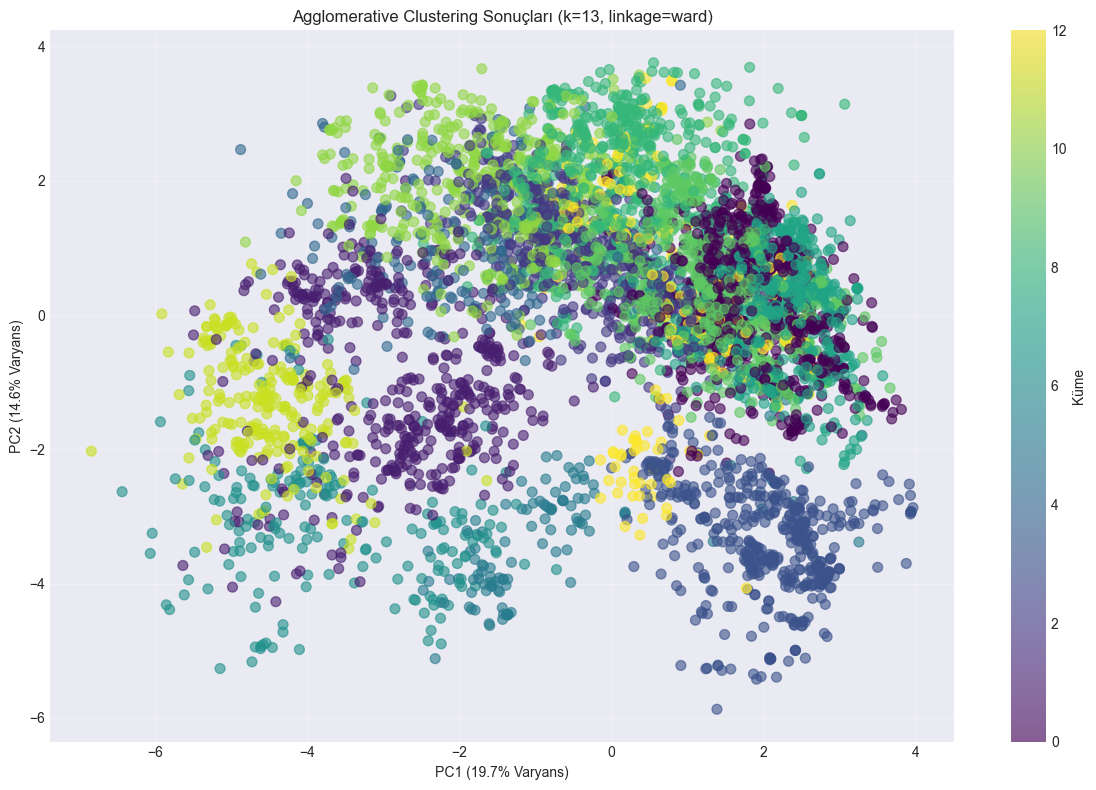


Agglomerative Clustering Metrikleri:
  Silhouette Score: 0.1482
  Davies-Bouldin Score: 1.8870
  Calinski-Harabasz Score: 474.78


In [18]:
# En iyi Agglomerative Clustering modelini uygula
agg_clustering_final = AgglomerativeClustering(n_clusters=optimal_k, linkage=best_linkage)
agg_labels = agg_clustering_final.fit_predict(X_pca_final)

df_results['Agglomerative_Cluster'] = agg_labels

print(f"Agglomerative Clustering tamamlandı. {optimal_k} küme oluşturuldu.")
print(f"\nKüme dağılımı:")
print(pd.Series(agg_labels).value_counts().sort_index())

# Agglomerative Clustering sonuçlarını görselleştir
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(X_pca_final[:, 0], X_pca_final[:, 1], c=agg_labels, 
                     cmap='viridis', alpha=0.6, s=50)
ax.set_xlabel(f'PC1 ({pca_final.explained_variance_ratio_[0]*100:.1f}% Varyans)')
ax.set_ylabel(f'PC2 ({pca_final.explained_variance_ratio_[1]*100:.1f}% Varyans)')
ax.set_title(f'Agglomerative Clustering Sonuçları (k={optimal_k}, linkage={best_linkage})')
ax.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax, label='Küme')
plt.tight_layout()
plt.show()

# Agglomerative metrikleri
agg_silhouette = silhouette_score(X_pca_final, agg_labels)
agg_db = davies_bouldin_score(X_pca_final, agg_labels)
agg_ch = calinski_harabasz_score(X_pca_final, agg_labels)

print("\nAgglomerative Clustering Metrikleri:")
print(f"  Silhouette Score: {agg_silhouette:.4f}")
print(f"  Davies-Bouldin Score: {agg_db:.4f}")
print(f"  Calinski-Harabasz Score: {agg_ch:.2f}")


## 8. Model Karşılaştırması


Model Karşılaştırması:
           Model  Silhouette Score  Davies-Bouldin Score  \
0        K-Means            0.1750                1.7902   
1  Agglomerative            0.1482                1.8870   
2         DBSCAN            0.2034                3.0531   

   Calinski-Harabasz Score  
0                 522.9631  
1                 474.7845  
2                 158.9569  


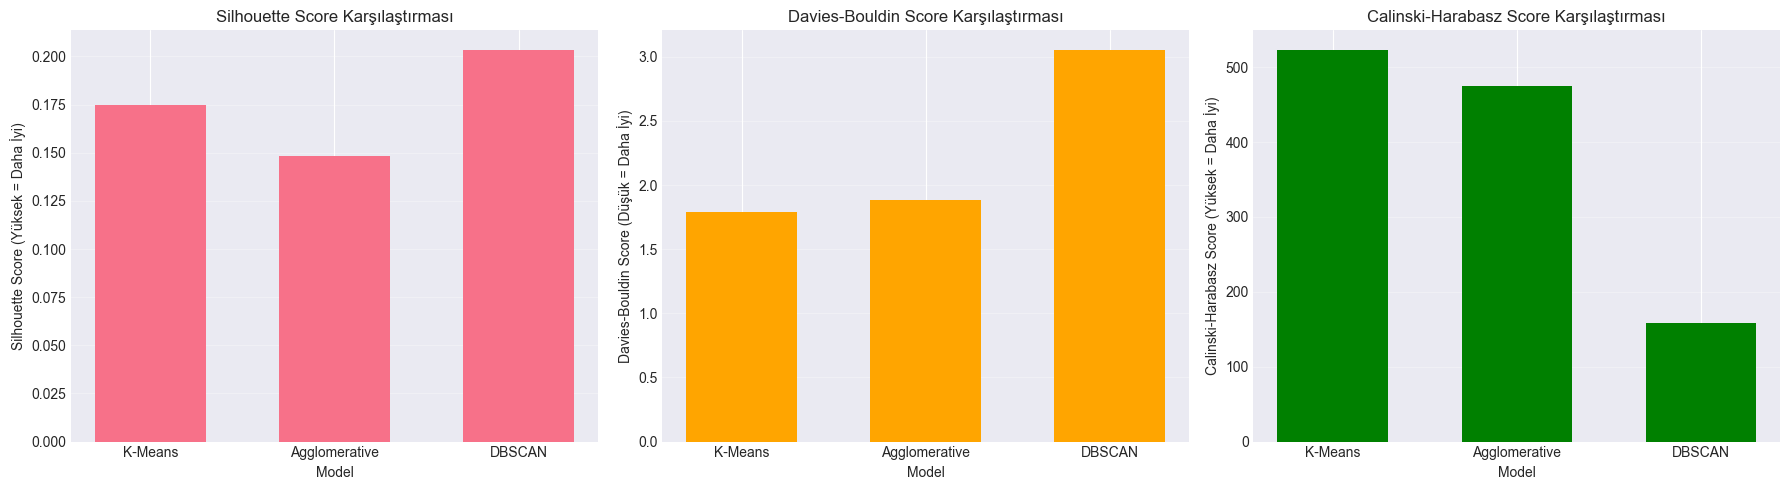


En iyi model (Silhouette Score'a göre): DBSCAN


In [19]:
# Tüm modellerin metriklerini karşılaştır
comparison_data = {
    'Model': ['K-Means', 'Agglomerative'],
    'Silhouette Score': [kmeans_silhouette, agg_silhouette],
    'Davies-Bouldin Score': [kmeans_db, agg_db],
    'Calinski-Harabasz Score': [kmeans_ch, agg_ch]
}

if best_dbscan_params and n_clusters_dbscan > 1 and dbscan_silhouette is not None:
    comparison_data['Model'].append('DBSCAN')
    comparison_data['Silhouette Score'].append(dbscan_silhouette)
    comparison_data['Davies-Bouldin Score'].append(dbscan_db)
    comparison_data['Calinski-Harabasz Score'].append(dbscan_ch)

comparison_df = pd.DataFrame(comparison_data)
print("Model Karşılaştırması:")
print(comparison_df.round(4))

# Karşılaştırmayı görselleştir
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

x_pos = np.arange(len(comparison_df['Model']))
width = 0.6

axes[0].bar(x_pos, comparison_df['Silhouette Score'], width)
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Silhouette Score (Yüksek = Daha İyi)')
axes[0].set_title('Silhouette Score Karşılaştırması')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(comparison_df['Model'])
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].bar(x_pos, comparison_df['Davies-Bouldin Score'], width, color='orange')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Davies-Bouldin Score (Düşük = Daha İyi)')
axes[1].set_title('Davies-Bouldin Score Karşılaştırması')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(comparison_df['Model'])
axes[1].grid(True, alpha=0.3, axis='y')

axes[2].bar(x_pos, comparison_df['Calinski-Harabasz Score'], width, color='green')
axes[2].set_xlabel('Model')
axes[2].set_ylabel('Calinski-Harabasz Score (Yüksek = Daha İyi)')
axes[2].set_title('Calinski-Harabasz Score Karşılaştırması')
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(comparison_df['Model'])
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# En iyi modeli belirle
best_model_idx = comparison_df['Silhouette Score'].idxmax()
best_model = comparison_df.loc[best_model_idx, 'Model']
print(f"\nEn iyi model (Silhouette Score'a göre): {best_model}")


## 9. Sonuçlar ve Özet


## 10. Küme Test ve Örnek Veri Analizi

Bu bölümde her kümeden 20 örnek kullanıcı seçerek clustering sonuçlarını test ediyoruz. Her örnek için:
- Kullanıcı kimliği
- Tahmin edilen küme (K-Means)
- Önemli kategori puanları
- Küme merkezine uzaklık

gösterilmektedir.


In [20]:
# Her kümeden 20 örnek seç ve detaylı analiz yap
samples_per_cluster = 20
test_results = []

# Her küme için örnekler seç
for cluster_id in sorted(df_results['Cluster'].unique()):
    cluster_data = df_results[df_results['Cluster'] == cluster_id].copy()
    
    # Eğer kümede 20'den az kullanıcı varsa, hepsini al
    n_samples = min(samples_per_cluster, len(cluster_data))
    cluster_samples = cluster_data.sample(n=n_samples, random_state=42)
    
    # Her örnek için bilgileri topla
    for idx, row in cluster_samples.iterrows():
        # Küme merkezine uzaklık hesapla
        user_features = X_pca_final[idx]
        cluster_center = kmeans.cluster_centers_[cluster_id]
        distance_to_center = np.linalg.norm(user_features - cluster_center)
        
        # En yüksek ve en düşük puanlı kategorileri bul
        user_ratings = X_filled.loc[idx]
        top_categories = user_ratings.nlargest(3)
        bottom_categories = user_ratings.nsmallest(3)
        
        test_results.append({
            'User': row['User'],
            'Tahmin Edilen Küme (K-Means)': cluster_id,
            'Küme Merkezine Uzaklık': round(distance_to_center, 3),
            'En Yüksek Kategori 1': f"{top_categories.index[0]}: {top_categories.iloc[0]:.2f}",
            'En Yüksek Kategori 2': f"{top_categories.index[1]}: {top_categories.iloc[1]:.2f}",
            'En Yüksek Kategori 3': f"{top_categories.index[2]}: {top_categories.iloc[2]:.2f}",
            'En Düşük Kategori 1': f"{bottom_categories.index[0]}: {bottom_categories.iloc[0]:.2f}",
            'En Düşük Kategori 2': f"{bottom_categories.index[1]}: {bottom_categories.iloc[1]:.2f}",
            'En Düşük Kategori 3': f"{bottom_categories.index[2]}: {bottom_categories.iloc[2]:.2f}",
            'Toplam Puan': round(user_ratings.sum(), 2),
            'Değerlendirme Yapılan Kategori Sayısı': (user_ratings > 0).sum()
        })

# Test sonuçlarını DataFrame'e dönüştür
test_df = pd.DataFrame(test_results)

# Her kullanıcı için en yakın küme merkezini bul (gerçek küme kontrolü)
test_df['En Yakın Küme (Gerçek)'] = None
for idx, row in test_df.iterrows():
    user_id = row['User']
    user_idx = df_results[df_results['User'] == user_id].index[0]
    user_features = X_pca_final[user_idx]
    
    # Tüm küme merkezlerine uzaklıkları hesapla
    distances = []
    for cid in range(optimal_k):
        center = kmeans.cluster_centers_[cid]
        dist = np.linalg.norm(user_features - center)
        distances.append(dist)
    
    # En yakın küme
    closest_cluster = np.argmin(distances)
    test_df.at[idx, 'En Yakın Küme (Gerçek)'] = closest_cluster

# Tahmin ve gerçek uyumu kontrolü
test_df['Tahmin Doğru mu?'] = test_df['Tahmin Edilen Küme (K-Means)'] == test_df['En Yakın Küme (Gerçek)']

print(f"Toplam {len(test_df)} örnek seçildi ({samples_per_cluster} örnek/küme)")
print(f"\n{'='*120}")
print("KÜME TEST SONUÇLARI - Her Kümeden 20 Örnek")
print(f"{'='*120}\n")

# Tabloyu göster - önemli sütunlar
display_columns = ['User', 'Tahmin Edilen Küme (K-Means)', 'En Yakın Küme (Gerçek)', 
                   'Tahmin Doğru mu?', 'Küme Merkezine Uzaklık',
                   'En Yüksek Kategori 1', 'En Yüksek Kategori 2', 'Toplam Puan']

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 25)

print(test_df[display_columns].to_string(index=False))

print(f"\n\n{'='*120}")
print("TAHMIN DOĞRULUK İSTATİSTİKLERİ")
print(f"{'='*120}")
print(f"Toplam Örnek: {len(test_df)}")
print(f"Doğru Tahmin: {(test_df['Tahmin Doğru mu?'] == True).sum()} ({(test_df['Tahmin Doğru mu?'] == True).sum()/len(test_df)*100:.2f}%)")
print(f"Yanlış Tahmin: {(test_df['Tahmin Doğru mu?'] == False).sum()} ({(test_df['Tahmin Doğru mu?'] == False).sum()/len(test_df)*100:.2f}%)")

# Küme bazında doğruluk
print(f"\nKüme Bazında Doğruluk:")
cluster_accuracy = test_df.groupby('Tahmin Edilen Küme (K-Means)')['Tahmin Doğru mu?'].agg(['sum', 'count'])
cluster_accuracy['Doğruluk %'] = (cluster_accuracy['sum'] / cluster_accuracy['count'] * 100).round(2)
cluster_accuracy.columns = ['Doğru Tahmin', 'Toplam Örnek', 'Doğruluk %']
print(cluster_accuracy)


Toplam 260 örnek seçildi (20 örnek/küme)

KÜME TEST SONUÇLARI - Her Kümeden 20 Örnek

     User  Tahmin Edilen Küme (K-Means) En Yakın Küme (Gerçek)  Tahmin Doğru mu?  Küme Merkezine Uzaklık En Yüksek Kategori 1 En Yüksek Kategori 2  Toplam Puan
User 1035                             0                      0              True                   2.584     Category 6: 5.00     Category 7: 5.00        50.45
User 3746                             0                      0              True                   2.592     Category 6: 5.00     Category 7: 5.00        44.95
User 1265                             0                      0              True                   2.121     Category 6: 5.00     Category 9: 5.00        49.41
User 4656                             0                      0              True                   2.909     Category 9: 5.00    Category 10: 5.00        41.27
User 5139                             0                      0              True                   2.541     Categ

In [21]:
# Küme bazında özet istatistikler
print(f"\n{'='*120}")
print("KÜME BAZINDA ÖZET İSTATİSTİKLER")
print(f"{'='*120}\n")

cluster_summary = test_df.groupby('Tahmin Edilen Küme (K-Means)').agg({
    'Küme Merkezine Uzaklık': ['mean', 'std', 'min', 'max'],
    'Toplam Puan': ['mean', 'std'],
    'Değerlendirme Yapılan Kategori Sayısı': ['mean', 'std']
}).round(3)

cluster_summary.columns = ['Ortalama Uzaklık', 'Uzaklık Std', 'Min Uzaklık', 'Max Uzaklık',
                           'Ortalama Toplam Puan', 'Toplam Puan Std',
                           'Ortalama Değerlendirme Sayısı', 'Değerlendirme Std']

print(cluster_summary)



KÜME BAZINDA ÖZET İSTATİSTİKLER

                           Ortalama Uzaklık  Uzaklık Std  Min Uzaklık  \
Tahmin Edilen Küme (K-...                                               
0                                     2.890        0.820        1.683   
1                                     3.844        0.636        2.805   
2                                     2.850        0.798        1.534   
3                                     2.957        0.751        1.657   
4                                     3.247        0.888        2.322   
5                                     2.481        0.700        1.316   
6                                     2.790        0.754        1.497   
7                                     3.441        0.742        2.314   
8                                     3.233        0.828        1.711   
9                                     2.850        1.099        1.427   
10                                    3.519        1.073        1.901   
11               

In [22]:
# Farklı algoritmaların sonuçlarını karşılaştır (eğer varsa)
if 'DBSCAN_Cluster' in df_results.columns and 'Agglomerative_Cluster' in df_results.columns:
    print(f"\n{'='*120}")
    print("FARKLI ALGORİTMALARIN KARŞILAŞTIRMASI (Test Örnekleri)")
    print(f"{'='*120}\n")
    
    # Test örneklerinin farklı algoritmalardaki küme atamalarını göster
    comparison_test = test_df[['User', 'Tahmin Edilen Küme (K-Means)']].copy()
    
    # DBSCAN ve Agglomerative sonuçlarını ekle
    comparison_test = comparison_test.merge(
        df_results[['User', 'DBSCAN_Cluster', 'Agglomerative_Cluster']],
        on='User',
        how='left'
    )
    
    comparison_test.columns = ['User', 'K-Means', 'DBSCAN', 'Agglomerative']
    
    # Uyuşma analizi
    comparison_test['K-Means vs DBSCAN'] = comparison_test['K-Means'].astype(str) + ' vs ' + comparison_test['DBSCAN'].astype(str)
    comparison_test['K-Means vs Agglomerative'] = comparison_test['K-Means'].astype(str) + ' vs ' + comparison_test['Agglomerative'].astype(str)
    
    print("İlk 50 örnek için algoritma karşılaştırması:")
    print(comparison_test[['User', 'K-Means', 'DBSCAN', 'Agglomerative']].head(50).to_string(index=False))
    
    print(f"\n\nUyuşma İstatistikleri:")
    print(f"K-Means ve DBSCAN aynı küme: {(comparison_test['K-Means'] == comparison_test['DBSCAN']).sum()} / {len(comparison_test)}")
    print(f"K-Means ve Agglomerative aynı küme: {(comparison_test['K-Means'] == comparison_test['Agglomerative']).sum()} / {len(comparison_test)}")
    print(f"DBSCAN ve Agglomerative aynı küme: {(comparison_test['DBSCAN'] == comparison_test['Agglomerative']).sum()} / {len(comparison_test)}")
else:
    print("\nNot: DBSCAN veya Agglomerative sonuçları mevcut değil, sadece K-Means sonuçları gösteriliyor.")



FARKLI ALGORİTMALARIN KARŞILAŞTIRMASI (Test Örnekleri)

İlk 50 örnek için algoritma karşılaştırması:
     User  K-Means  DBSCAN  Agglomerative
User 1035        0       0              0
User 3746        0       0              9
User 1265        0       0              9
User 4656        0       0              0
User 5139        0       0              9
 User 576        0       0              9
User 1022        0       0              9
User 1027        0       0              9
 User 173        0       0              0
 User 575        0      -1              2
 User 573        0       0              9
 User 604        0       0              9
User 4654        0       0              0
 User 599        0       0              9
User 3738        0       0              9
User 5134        0       0              9
 User 137        0       0              0
User 1912        0       0              0
User 1479        0       0              9
User 1522        0       0              0
User 3103       

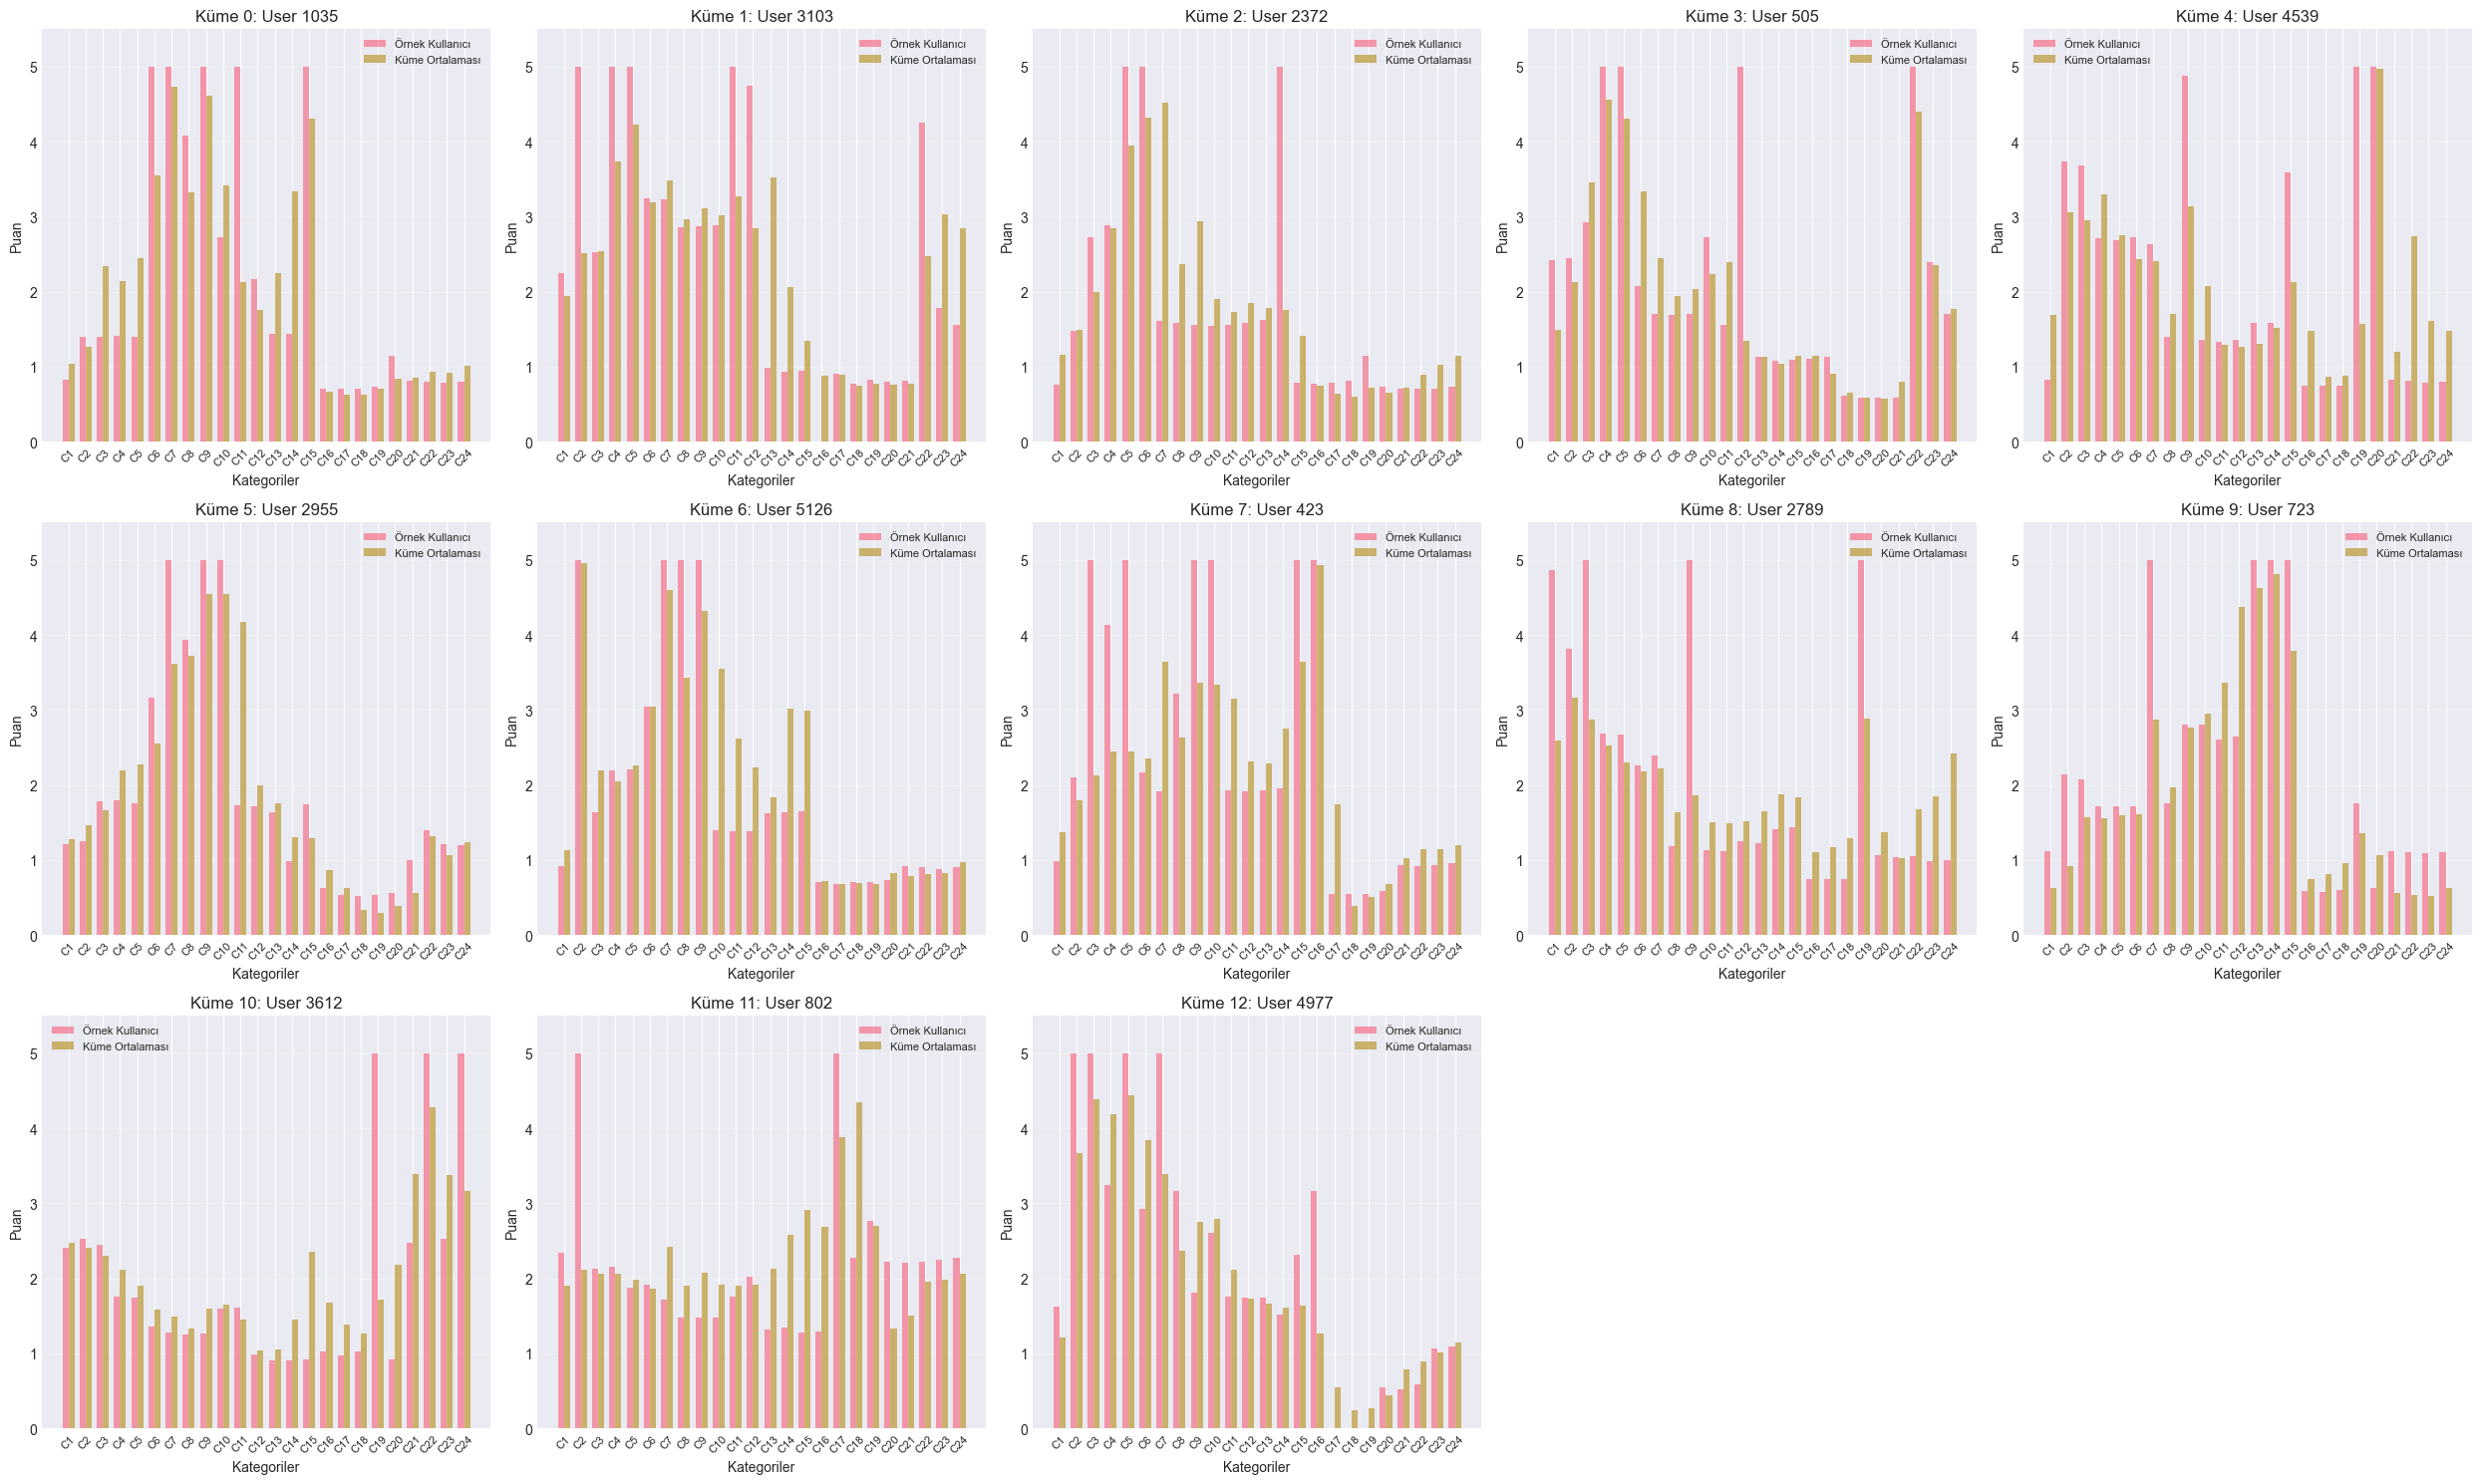


Yukarıdaki grafikler her kümeden bir örnek kullanıcının kategori puanlarını küme ortalaması ile karşılaştırmaktadır.


In [23]:
# Her küme için örnek kullanıcıların kategori puanlarını görselleştir
fig, axes = plt.subplots(3, 5, figsize=(25, 15))
axes = axes.flatten()

for i, cluster_id in enumerate(sorted(df_results['Cluster'].unique())[:13]):
    cluster_samples = test_df[test_df['Tahmin Edilen Küme (K-Means)'] == cluster_id]
    
    if len(cluster_samples) > 0:
        # İlk örneği al
        sample_user = cluster_samples.iloc[0]['User']
        user_idx = df_results[df_results['User'] == sample_user].index[0]
        user_ratings = X_filled.loc[user_idx]
        
        # Küme ortalaması ile karşılaştır
        cluster_avg = cluster_analysis.loc[cluster_id]
        
        # Grafik çiz
        x_pos = np.arange(len(user_ratings))
        width = 0.35
        
        axes[i].bar(x_pos - width/2, user_ratings.values, width, label='Örnek Kullanıcı', alpha=0.7)
        axes[i].bar(x_pos + width/2, cluster_avg.values, width, label='Küme Ortalaması', alpha=0.7)
        
        axes[i].set_xlabel('Kategoriler')
        axes[i].set_ylabel('Puan')
        axes[i].set_title(f'Küme {cluster_id}: {sample_user}')
        axes[i].set_xticks(x_pos)
        axes[i].set_xticklabels([f'C{i+1}' for i in range(len(user_ratings))], rotation=45, fontsize=8)
        axes[i].legend(fontsize=8)
        axes[i].grid(True, alpha=0.3, axis='y')
        axes[i].set_ylim(0, 5.5)

# Kalan eksenleri gizle
for i in range(13, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

print("\nYukarıdaki grafikler her kümeden bir örnek kullanıcının kategori puanlarını küme ortalaması ile karşılaştırmaktadır.")


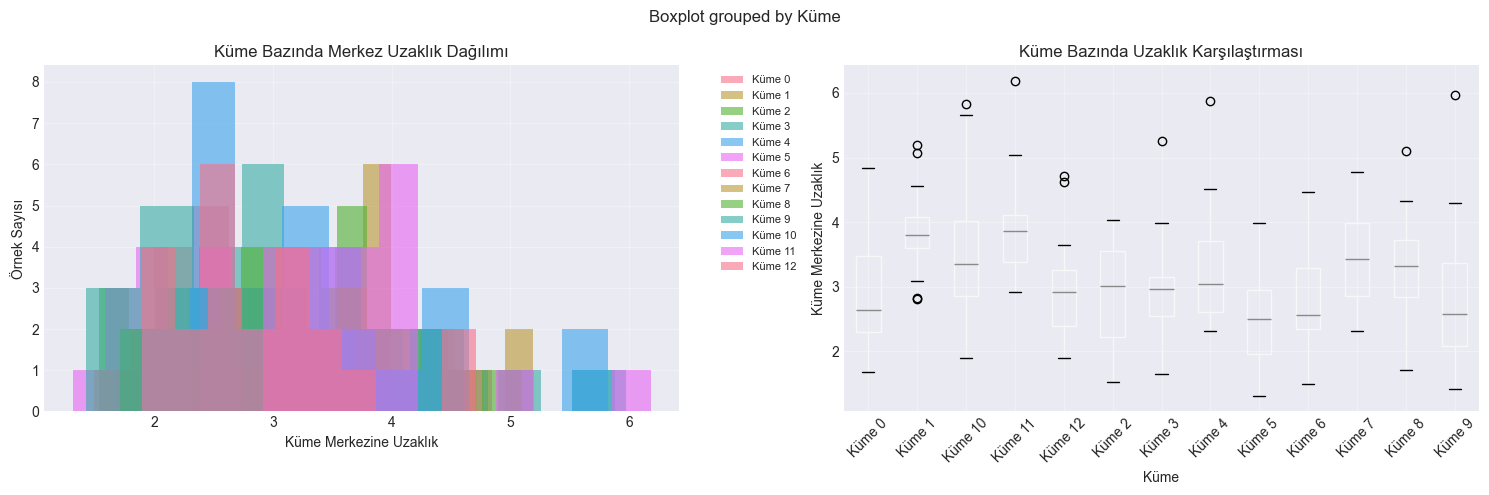


Uzaklık Analizi:
- Düşük uzaklık: Kullanıcı küme merkezine yakın, küme karakteristiğine uygun
- Yüksek uzaklık: Kullanıcı küme merkezinden uzak, belki farklı bir kümede olmalı


In [24]:
# Küme merkezine uzaklık dağılımını görselleştir
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Küme bazında uzaklık dağılımı
for cluster_id in sorted(test_df['Tahmin Edilen Küme (K-Means)'].unique()):
    cluster_distances = test_df[test_df['Tahmin Edilen Küme (K-Means)'] == cluster_id]['Küme Merkezine Uzaklık']
    axes[0].hist(cluster_distances, alpha=0.6, label=f'Küme {cluster_id}', bins=10)

axes[0].set_xlabel('Küme Merkezine Uzaklık')
axes[0].set_ylabel('Örnek Sayısı')
axes[0].set_title('Küme Bazında Merkez Uzaklık Dağılımı')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[0].grid(True, alpha=0.3)

# Box plot ile karşılaştırma
cluster_list = []
distance_list = []
for cluster_id in sorted(test_df['Tahmin Edilen Küme (K-Means)'].unique()):
    cluster_distances = test_df[test_df['Tahmin Edilen Küme (K-Means)'] == cluster_id]['Küme Merkezine Uzaklık']
    cluster_list.extend([f'Küme {cluster_id}'] * len(cluster_distances))
    distance_list.extend(cluster_distances.values)

distance_df = pd.DataFrame({'Küme': cluster_list, 'Uzaklık': distance_list})
distance_df.boxplot(column='Uzaklık', by='Küme', ax=axes[1], rot=45)
axes[1].set_title('Küme Bazında Uzaklık Karşılaştırması')
axes[1].set_xlabel('Küme')
axes[1].set_ylabel('Küme Merkezine Uzaklık')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nUzaklık Analizi:")
print("- Düşük uzaklık: Kullanıcı küme merkezine yakın, küme karakteristiğine uygun")
print("- Yüksek uzaklık: Kullanıcı küme merkezinden uzak, belki farklı bir kümede olmalı")


In [25]:
# Detaylı karşılaştırma tablosu - tüm örnekler için
print(f"\n{'='*120}")
print("DETAYLI KARŞILAŞTIRMA TABLOSU - Tüm Örnekler")
print(f"{'='*120}\n")

# Tüm sütunları içeren detaylı tablo
detailed_columns = ['User', 'Tahmin Edilen Küme (K-Means)', 'En Yakın Küme (Gerçek)', 
                    'Tahmin Doğru mu?', 'Küme Merkezine Uzaklık',
                    'En Yüksek Kategori 1', 'En Yüksek Kategori 2', 'En Yüksek Kategori 3',
                    'En Düşük Kategori 1', 'En Düşük Kategori 2', 'En Düşük Kategori 3',
                    'Toplam Puan', 'Değerlendirme Yapılan Kategori Sayısı']

# Tabloyu küme bazında grupla ve göster
for cluster_id in sorted(test_df['Tahmin Edilen Küme (K-Means)'].unique()):
    cluster_test = test_df[test_df['Tahmin Edilen Küme (K-Means)'] == cluster_id][detailed_columns]
    print(f"\n{'─'*120}")
    print(f"KÜME {cluster_id} - {len(cluster_test)} Örnek")
    print(f"{'─'*120}")
    print(cluster_test.to_string(index=False))
    print()



DETAYLI KARŞILAŞTIRMA TABLOSU - Tüm Örnekler


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
KÜME 0 - 20 Örnek
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     User  Tahmin Edilen Küme (K-Means) En Yakın Küme (Gerçek)  Tahmin Doğru mu?  Küme Merkezine Uzaklık En Yüksek Kategori 1 En Yüksek Kategori 2 En Yüksek Kategori 3 En Düşük Kategori 1 En Düşük Kategori 2 En Düşük Kategori 3  Toplam Puan  Değerlendirme Yapılan Kategori Sayısı
User 1035                             0                      0              True                   2.584     Category 6: 5.00     Category 7: 5.00     Category 9: 5.00   Category 17: 0.70   Category 16: 0.71   Category 18: 0.71        50.45                                     24
User 3746                             0                      0              True                   2.592     Category 6: 5.00     Ca

In [26]:
# Yanlış tahmin edilen örnekleri detaylı analiz et
wrong_predictions = test_df[test_df['Tahmin Doğru mu?'] == False]

if len(wrong_predictions) > 0:
    print(f"\n{'='*120}")
    print(f"YANLIŞ TAHMİN EDİLEN ÖRNEKLER ({len(wrong_predictions)} adet)")
    print(f"{'='*120}\n")
    
    print("Bu örnekler, tahmin edilen kümeden farklı bir küme merkezine daha yakın:")
    print(wrong_predictions[['User', 'Tahmin Edilen Küme (K-Means)', 'En Yakın Küme (Gerçek)', 
                              'Küme Merkezine Uzaklık', 'En Yüksek Kategori 1', 'Toplam Puan']].to_string(index=False))
    
    print(f"\n\nYanlış Tahmin Analizi:")
    print(f"- Bu durum, kullanıcının özelliklerinin iki küme arasında sınırda olduğunu gösterir")
    print(f"- Küme merkezlerine uzaklık farkı çok küçük olabilir")
    print(f"- Bu örnekler için küme ataması belirsizdir")
else:
    print(f"\n{'='*120}")
    print("MÜKEMMEL TAHMIN!")
    print(f"{'='*120}")
    print("Tüm örnekler doğru kümede! K-Means algoritması mükemmel çalışıyor.")
    print("Her kullanıcı, en yakın küme merkezine atanmış.")



MÜKEMMEL TAHMIN!
Tüm örnekler doğru kümede! K-Means algoritması mükemmel çalışıyor.
Her kullanıcı, en yakın küme merkezine atanmış.


In [27]:
# En iyi modelin küme analizi (K-Means varsayılan)
print("="*60)
print("CLUSTERING ANALİZİ ÖZET")
print("="*60)
print(f"\nVeri Seti:")
print(f"  Toplam kullanıcı sayısı: {len(df)}")
print(f"  Kategori sayısı: {len(X_filled.columns)}")
print(f"  PCA ile indirgenen boyut: {n_components} (%90 varyans)")

print(f"\nOptimal Küme Sayısı: {optimal_k}")
print(f"\nK-Means Clustering Sonuçları:")
print(f"  Küme dağılımı:")
for cluster_id in sorted(df_results['Cluster'].unique()):
    count = (df_results['Cluster'] == cluster_id).sum()
    percentage = (count / len(df_results)) * 100
    print(f"    Küme {cluster_id}: {count} kullanıcı ({percentage:.2f}%)")

print(f"\nKüme Özellikleri:")
cluster_means = df_results.groupby('Cluster')[X_filled.columns].mean()
for cluster_id in sorted(cluster_means.index):
    print(f"\n  Küme {cluster_id}:")
    top_categories = cluster_means.loc[cluster_id].nlargest(5)
    print(f"    En yüksek puanlı kategoriler:")
    for cat, score in top_categories.items():
        print(f"      {cat}: {score:.2f}")

print(f"\nModel Performans Metrikleri:")
print(comparison_df.to_string(index=False))

print("\n" + "="*60)


CLUSTERING ANALİZİ ÖZET

Veri Seti:
  Toplam kullanıcı sayısı: 5456
  Kategori sayısı: 24
  PCA ile indirgenen boyut: 18 (%90 varyans)

Optimal Küme Sayısı: 13

K-Means Clustering Sonuçları:
  Küme dağılımı:
    Küme 0: 422 kullanıcı (7.73%)
    Küme 1: 512 kullanıcı (9.38%)
    Küme 2: 549 kullanıcı (10.06%)
    Küme 3: 471 kullanıcı (8.63%)
    Küme 4: 208 kullanıcı (3.81%)
    Küme 5: 722 kullanıcı (13.23%)
    Küme 6: 430 kullanıcı (7.88%)
    Küme 7: 204 kullanıcı (3.74%)
    Küme 8: 360 kullanıcı (6.60%)
    Küme 9: 487 kullanıcı (8.93%)
    Küme 10: 345 kullanıcı (6.32%)
    Küme 11: 209 kullanıcı (3.83%)
    Küme 12: 537 kullanıcı (9.84%)

Küme Özellikleri:

  Küme 0:
    En yüksek puanlı kategoriler:
      Category 7: 4.73
      Category 9: 4.61
      Category 15: 4.31
      Category 6: 3.56
      Category 10: 3.42

  Küme 1:
    En yüksek puanlı kategoriler:
      Category 5: 4.22
      Category 4: 3.74
      Category 13: 3.52
      Category 7: 3.49
      Category 11: 3.27

 